# Current version : 9.b (2025-04-28)

# Libraries and directory (always run)

In [1]:
### import necessary libraries
import anndata as ad
from datetime import datetime

import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scanpy as sc
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore") 
sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1 # errors (0), warnings (1), info (2), hints (3)
plt.rcParams["font.family"] = "Arial"
sns.set_style("white")

# Note that BANKSY itself is deterministic, here the seeds affect the umap clusters and leiden partition
seed = 1234
np.random.seed(seed)
random.seed(seed)

start_time = datetime.now()

def print_with_elapsed_time(message):
    elapsed_time = datetime.now() - start_time
    elapsed_seconds = elapsed_time.total_seconds()
    print(f"[{elapsed_seconds:.2f} seconds] {message}")

scanpy==1.9.5 anndata==0.10.2 umap==0.5.4 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.6 pynndescent==0.5.10


In [2]:
# print(f"geopandas version: {gpd.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scanpy version: {sc.__version__}")

pandas version: 2.1.1
scanpy version: 1.9.5


In [3]:
### Directory where the data is stored

# dir = "/mnt/d/Xenium" #Ubuntu
# dir = 'D:\\Xenium'
# dir = "/media/volume/data/spatial/hugo/data" #Ubuntu
# dir = "/media/volume/data/spatial/hugo/data/k5" #Ubuntu
# dir = '/media/volume/volume_spatial/hugo/data/test'
dir = '/media/volume/volume_spatial/hugo/data'

# dir_notebook = 'D:\\Jupyter_notebook/Xenium_jupyter_notebook'
# dir_notebook = '/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook'
# dir_notebook = '/media/volume/data/spatial/hugo/notebook'
dir_notebook = '/media/volume/volume_spatial/hugo/notebook'


In [4]:
# # # # ### HC ###

# # # # ### make a list of samples and their ids to make the cell names unique
# # # # #samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855", "3160-1__20240321__212855", "3160-2__20240321__212855"]
# # # # #samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1", "3160-1", "3160-2"]
# # # # #name_dir = 'run1-2'

# # # # # ### Run 1 resegmented
# # # # samples = ["2505-1_subsampled", "2505-2_subsampled", "2670-1_subsampled", 
# # # #    "3159-1_subsampled"
# # # #     , "3160-1_subsampled", "3160-2_subsampled"]
# # # # samples_ids = ["2505-1", "2505-2", "2670-1", 
# # # #               "3159-1", "3160-1", "3160-2"       ]
# # # # name_dir = 'run1-resegment'

# # # # # # #Run 3
# # # # # samples = ["3159-2__20240530__205547", "3159-3__20240530__205547", "3159-4__20240530__205547", "3161-1__20240530__205547", "3161-2__20240530__205547", "3161-3__20240530__205547"]
# # # # # samples_ids = ["3159-2", "3159-3", "3159-4", "3161-1", "3161-2", "3161-3"]
# # # # # name_dir = 'run3-all'

# # # # # Run 3 Habenula
# # # samples = ["3159-2__20240530__205547", "3161-1__20240530__205547"]
# # # samples_ids = ["3159-2", "3161-1"]
# # # name_dir = 'run3-Habenula'

# # # # # # # Run 3 LGN
# # # # samples = ["3159-3__20240530__205547", "3161-2__20240530__205547"]
# # # # samples_ids = ["3159-3","3161-2"]
# # # # name_dir = 'run3-LGN'

# # # # # #Run 3 SC
# samples = ["3159-4","3161-3"]
# samples_ids = ["3159-4", "3161-3"]
# name_dir = 'run3-SC'

# # # # # samples = ["Xenium_Prime_Mouse_Brain_Coronal_FF_outs"]
# # # # # samples_ids = ['Xenium_Prime']
# # # # # name_dir = 'test-prime'

# # # # # # circa1
# # samples = ['circa1_ZT1','circa1_ZT5','circa1_ZT9','circa1_ZT13','circa1_ZT17','circa1_ZT21']
# # samples_ids = ['circa1-ZT1','circa1-ZT5','circa1-ZT9','circa1-ZT13','circa1-ZT17','circa1-ZT21',]
# # name_dir = 'circa1'

# # # ### circa2_
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21']
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',]
# name_dir = 'circa2'

# # ### circa3_
# samples = ['circa3-ZT01','circa3-ZT05','circa3-ZT09','circa3-ZT13','circa3-ZT17','circa3-ZT21']
# samples_ids = ['circa3-ZT01','circa3-ZT05','circa3-ZT09','circa3-ZT13','circa3-ZT17','circa3-ZT21',]
# name_dir = 'circa3'

# ### circa4-Salk
# samples = ['circa4-Salk-ZT01',
#            'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
#            'circa4-Salk-ZT21',]
# samples_ids = ['circa4-Salk-ZT01',
#                'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
#                'circa4-Salk-ZT21',]
# name_dir = 'circa4-Salk'


# circa4-IGM
# samples_ids = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# samples = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# name_dir = 'circa4-IGM'


### All 5k
samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
            'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
            'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
            'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
            'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
                ]
samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
            'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
            'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
            'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
            'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
               ]
name_dir = 'circa'


# # # # # # ### ALL SAMPLES
samples = ["2505-1", "2505-2", "2670-1", "3159-1",
               "3160-1", "3160-2","3159-2", "3161-1",
              "3159-3","3161-2","3159-4", "3161-3"
              ]

samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1",
               "3160-1", "3160-2","3159-2", "3161-1",
              "3159-3","3161-2","3159-4", "3161-3"
              ]
name_dir = 'all-samples'

# samples = ["CONTROLS","GCA"]
# samples_ids = ["CONTROLS","GCA"]
# name_dir = "Human-arteries"

# samples = ["Region1"
#         #    ,"Region2","Region3"
#            ]
# samples_ids = ["Region1"
#             #    ,"Region2","Region3"
#                ]
# name_dir = "MB_test"


# samples = ['S1_Region1']
# samples_ids = ["S1_Region1"]
# name_dir = 'march-test'

# Data importation

In [ ]:
import scanpy as sc

adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_clusters.h5ad.gz")

# Annotations

## Initial annotation

### Automatic initial annotation

In [ ]:
from module.subclustering_Xe import automatic_initial_annotation

adata = automatic_initial_annotation(adata, 'leiden')

### File save

In [ ]:
if 'leiden_colors' in adata_spatial.obs:
    adata_spatial.obs = adata_spatial.obs.drop(columns=['leiden_colors'])

adata_spatial.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_clusters.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_clusters.h5ad.gz")

## Cluster check

In [ ]:
adata

In [45]:
# Generate new numbering base on unique 'cell type'
# all_cell_type = adata.obs['cell type'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['cell_type_newnum'] = adata.obs['cell type'].map(mapping_dict)
# mapping_dict

# all_cell_type = adata.obs['cell_type_auto'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['cell_type_newnum_auto'] = adata.obs['cell_type_auto'].map(mapping_dict)
# mapping_dict

all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

# all_cell_type = adata.obs['mmc:subclass_name'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['mmc:subclass_num'] = adata.obs['mmc:subclass_name'].map(mapping_dict)
# mapping_dict

# all_cell_type = adata.obs['mmc:class_name'].unique()
# list_cell_nb = range(0, len(all_cell_type))
# mapping_dict = dict(zip(all_cell_type,list_cell_nb))
# adata.obs['mmc:class_num'] = adata.obs['mmc:class_name'].map(mapping_dict)
# mapping_dict


{'Tanycyte': 0,
 'ARH Glut': 1,
 'ZI Glut': 2,
 'VMH Glut': 3,
 'Ependymal': 4,
 'DMH Glut': 5,
 'Oligodendrocyte': 6,
 'PH Glut': 7,
 'TH Glut': 8,
 'LHA Glut': 9,
 'PVH SO PVa Glut': 10,
 'Endothelial': 11,
 'Microglia': 12,
 'Astro TE': 13,
 'L2 3 IT PIR ENTl Glut': 14,
 'AMY Gaba': 15,
 'AMY Glut': 16,
 'Sst Gaba': 17,
 'Pvalb Gaba': 18,
 'VLMC': 19,
 'ABC': 20,
 'STR D1D2 Gaba': 21,
 'HY Gaba': 22,
 'GP Gaba': 23,
 'OPC': 24,
 'STN Glut': 25,
 'AHN RCH LHA Glut': 26,
 'RT ZI Gaba': 27,
 'PAL STR Gaba Chol': 28,
 'GP Glut': 29,
 'L6 IT CTX Glut': 30,
 'Vip Gaba': 31,
 'CA3 Glut': 32,
 'CA2 FC IG Glut': 33,
 'Lamp5 Gaba': 34,
 'Pericyte': 35,
 'CLA EPd CTX Glut': 36,
 'L6b CTX Glut': 37,
 'L6 CT CTX Glut': 38,
 'L4 5 IT CTX Glut': 39,
 'L2 3 IT CTX Glut': 40,
 'L5 ET CTX Glut': 41,
 'L5 NP CTX Glut': 42,
 'IT EP CLA Glut': 43,
 'STR PAL Gaba': 44,
 'CA1 ProS Glut': 45,
 'Choroid': 46,
 'LH Glut': 47,
 'MH Glut': 48,
 'DG Glut': 49,
 'L2 3 IT RSP Glut': 50,
 'L4 RSP ACA Glut': 51,
 '

In [44]:
# adata.obs.groupby('cell type')['cell type'].count()
adata.obs['cell_type_final'].value_counts().sort_index()

cell_type_final
ABC                       17463
AD Glut                    1215
AHN RCH LHA Glut         125670
AMY Gaba                  13812
AMY Glut                  19640
ARH Glut                   4552
Astro TE                 297845
BST Gaba                     80
BST po Glut                1749
CA1 ProS Glut             11591
CA2 FC IG Glut             3752
CA3 Glut                   9639
CLA EPd CTX Glut          12309
Choroid                   21087
DG Glut                   31793
DMH Glut                   2601
Endothelial              223489
Ependymal                 32863
GP Gaba                     312
GP Glut                     406
HPF CR Glut                 847
HY Gaba                    1184
IT EP CLA Glut              294
L2 3 IT CTX Glut          29376
L2 3 IT PIR ENTl Glut     75685
L2 3 IT RSP Glut           5317
L4 5 IT CTX Glut          99428
L4 RSP ACA Glut            1368
L5 ET CTX Glut            17774
L5 NP CTX Glut             8074
L6 CT CTX Glut          

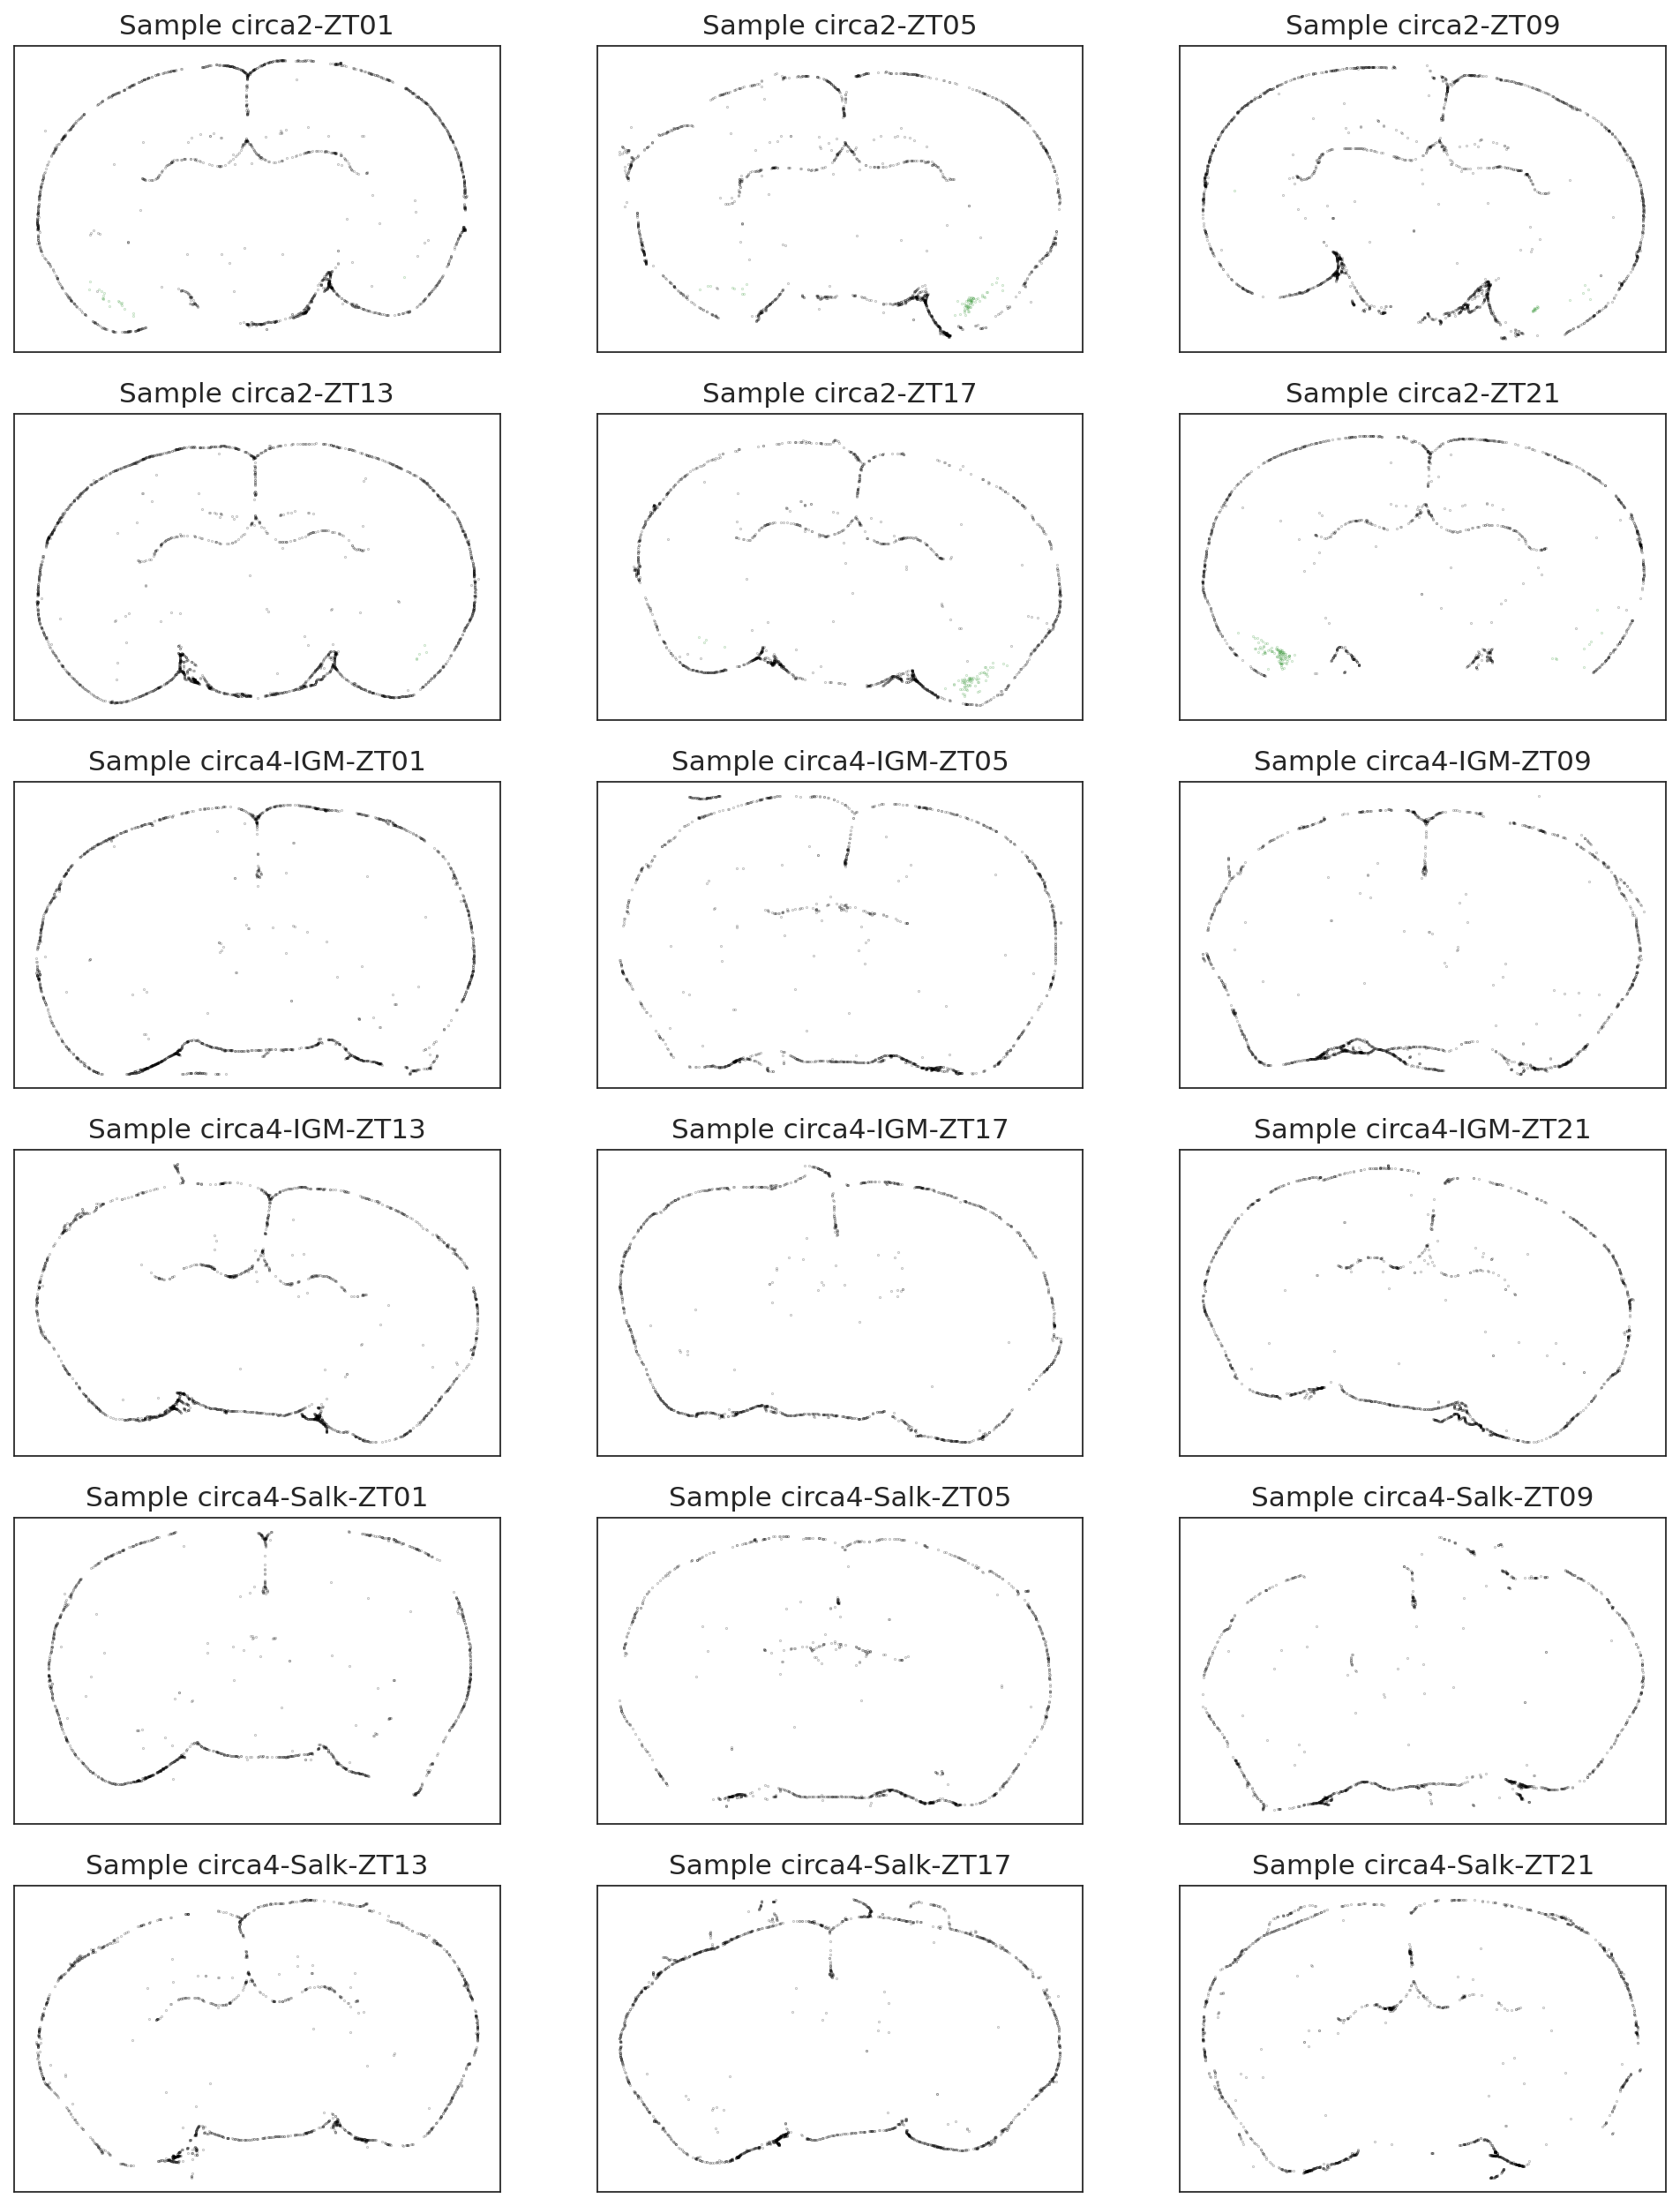

In [48]:
### Check clusters one by one to see if they are present in all sample and which would need subclustering

# cluster_to_use = 'cell_type_newnum_auto'
# cluster_to_use = 'cell_type_newnum_auto_sub'
cluster_to_use = 'cell_type_newnum_final'
# cluster_to_use = 'mmc:subclass_num'
# cluster_to_use = 'mmc:class_num'

### Generate a color palette for the clusters - to make color stay consistent across samples
adata.obs[cluster_to_use] = adata.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("tab20b", n_colors=num_clusters +1)

# Map each 'leiden' value to a color
adata.obs['leiden_colors'] = adata.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

# Map all cells
fig, axs = plt.subplots(6,3,figsize=(15, 20))
axs = axs.flatten()
clusters_plot = {"19":'black', ### For VLMC
    # '0': 'lightcoral', "1" : 'forestgreen', '2':'red', "3":'purple', "4":"yellow",
    # '5': 'lightcoral', "6" : 'forestgreen', "7":'red', "8":'purple', "9":"yellow"
    # '10': 'lightcoral',"11": 'forestgreen', '12':'red', "13":'purple', "14":"yellow", "15": "blue",
    # '16': 'lightcoral',"17": 'forestgreen', '18':'red', "19":'purple', "20":"yellow"
    # '21': 'lightcoral',"22": 'forestgreen', '23':'red', "":'purple', "":"yellow",
    # '24': 'lightcoral',"25": 'forestgreen', '26':'red', "27":'purple', "28":"yellow",
    # '29': 'lightcoral',"30": 'forestgreen', '31':'red', "32":'purple', "33":"yellow",
    # '34': 'lightcoral',"35": 'forestgreen', '36':'red', "37":'purple', "38":"yellow", "39": "blue",
    # '40': 'lightcoral',"41": 'forestgreen', '42':'red', "43":'purple', "44":"yellow", "45": "blue",
    # '46': 'lightcoral',"47": 'forestgreen', '48':'red', "49":'purple', "50":"orange", "51": "blue",
    # '52': 'lightcoral',"53": 'forestgreen', '54':'red', "55":'purple', "56":"yellow", "57": "blue",
    # '58': 'lightcoral',"59": 'forestgreen', '60':'red', "61":'purple', "62":"yellow", "63": "blue",
    # '64': 'lightcoral',"65": 'forestgreen', '66':'red', "67":'purple', "68":"yellow", "69": "blue",
    # '70': 'lightcoral',"71": 'forestgreen', '72':'red', "73":'purple', "74":"yellow", "75": "blue",
    # '76': 'lightcoral',"77": 'forestgreen', '78':'red', "79":'purple', "80":"yellow", "81": "blue",
    # '82': 'lightcoral',"83": 'forestgreen', '84':'red', "85":'purple', "86":"orange", "87": "blue",
    # '88': 'lightcoral',"89": 'forestgreen', '90':'red', "91":'purple', "92":"yellow", "93": "blue",
    # '94': 'lightcoral',"95": 'forestgreen', '96':'red', "97":'purple', "98":"yellow", "99": "blue",
    # '100':'lightcoral',"101": 'forestgreen', '102':'red', "103":'purple', "104":"yellow", "105": "blue",

    '': 'lightcoral',"43": 'forestgreen', '':'red', "":'purple', "":"orange",'':'blue',
    # '59': 'lightcoral',"60": 'forestgreen', '64':'red', "65":'purple', "61":"yellow",
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata[(adata.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        # colors = cluster_data['leiden_colors'].unique()[0] ### uncomment for all clusters
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=0.01, label=cluster_id)
        axs[idx].get_xaxis().set_visible(False)
        axs[idx].get_yaxis().set_visible(False)
        axs[idx].set_title(f"Sample {sample}")
del adata_sel

In [ ]:
from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (10, 10)}):
    sc.pl.umap(
        adata,
        color="cell_type_auto_sub",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="clustering of cells",
        palette="tab20",
    )

In [56]:
# To rename a cell type in case of typo or mistakes (easier than re-running)
rename_subclass = {
"BST po Glut" : 'BST Glut',

}
                  
adata.obs['cell_type_final'] = adata.obs['cell_type_final'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell_type_final'].unique()

['Tanycyte', 'ARH Glut', 'ZI Glut', 'VMH Glut', 'Ependymal', ..., 'LSX Gaba', 'NLOT Glut', 'BST Glut', 'SCH Gaba', 'AD Glut']
Length: 62
Categories (62, object): ['ABC', 'AD Glut', 'AHN RCH LHA Glut', 'AMY Gaba', ..., 'VLMC', 'VMH Glut', 'Vip Gaba', 'ZI Glut']

In [ ]:
# To rename a cell type in case of typo or mistakes (easier than re-running)
rename_subclass = {'L4/5 IT CTX': 'L4 5 IT CTX',
                   'L2/3 IT CTX': 'L2 3 IT CTX',
                   'CA1-ProS':  'CA1 ProS',
                   'STN-PSTN': 'STN PSTN',
                   'SUB-ProS': 'SUB ProS',
                   'L2/3 IT RSP': 'L2 3 IT RSP',
                   'L2/3 UT RSP': 'L2 3 IT RSP',
                   'L2/3 IT ENT': 'L2 3 IT ENT',
                   'L5/6 IT TPE-ENT': 'L5 6 IT TPE ENT',
                   'CLA-EPd-CTX': 'CLA EPd CTX',
                   'STR D1/D2': 'STR D1D2 GABA',
                   'STR D1/D2 GABA': 'STR D1D2 GABA',
                   'L2/3 IT PIR-ENTI': 'L2 3 IT PIR ENTI',
                   'L2/3 PIR-ENTI': 'L2 3 IT PIR ENTI',
                   'L2 3 IT PIR-ENTI': 'L2 3 IT PIR ENTI',
                   'Pvalb-Sst GABA': 'interneurons GABA',
                   'L4/5 IT CTX': 'L4 5 IT CTX',
                   'MEA-BST GABA': 'MEA BST GABA',
                   'TRS-BAC Glut': 'TRS BAC Glut',
                   'STR-PAL GABA': 'STR PAL GABA',
                   'PAL-STR GABA-Chol': 'PAL STR GABA Chol',
                   'RT-ZI Glut': 'RT ZI Glut',
                   'CLA-EPd-CTX Glut':  'CLA EPd CTX Glut',
                   'RT-ZI': 'RT ZI',
                   'CA1-ProS': 'CA1 ProS',
                   'Chor':'CHOR',
                   'L2/3 IT':  'L2 3 IT',
                   'L2/3 IT CTX': 'L2 3 IT CTX',
                   'Pvalb-Sst': 'interneurons GABA',
                   'IT EP-CLA': 'IT EP CLA',
                   'L4 RSP-ACA': 'L4 RSP ACA',
                   'Sub-ProS': 'SUB ProS',
                   'Interneurons GABA':'interneurons GABA',

                   
                   
                  }
adata.obs['cell type'] = adata.obs['cell type'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell type'].unique()

In [ ]:
adata.obsm['X_pca'] = adata.obsm['reduced_pc_20']
adata.obsm['X_umap'] = adata.obsm['reduced_pc_20_umap']

In [ ]:
if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])

# adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_clusters.h5ad.gz", compression='gzip')
adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_clusters_combined.h5ad.gz", compression='gzip')

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_clusters_combined.h5ad.gz")

## Subclustering

In [ ]:
# adata.obs.groupby('cell type')['cell type'].count()
adata.obs['cell_type_newnum_auto'].value_counts()

### Automatic subclustering

In [ ]:
from module.subclustering_Xe import auto_subclustering2

auto_subclustering2(adata_to_sub = adata, ###
                    all_types =  'all', ### 'all' or ['0','1'] for selected number of clusters
                    Clusters_to_use = 'cell_type_newnum_auto',
                    resolution = 0.05)

#### Table

In [38]:
from module.subclustering_Xe import cluster_table

cont_tab, cont_tab_sub, cluster_df = cluster_table(adata_to_use = adata,
                                                   Clusters_to_use = 'cell_type_newnum_final',
                                                   sort_order='Correlation',
                                                   sort_ascend = True
                                                   )

cluster_df

[                                                                        ]   0%


[=                                                                       ]   1%
[=====                                                                   ]   7%
[=========                                                               ]  13%
[===========                                                             ]  15%
[============                                                            ]  17%
[==================                                                      ]  25%
[======================                                                  ]  30%
[========================                                                ]  34%
[==============================                                          ]  42%
[=====================================                                   ]  51%
[==========================================                              ]  59%
[=================================================                       ]  69%
[=======================================

,Correlation,Celltype,Cell Class,Cell Count,Percentage
18,0.060906,132 AHN-RCH-LHA Otp Fezf1 Glut,11 CNU-HYa GABA,125670,5.181567
1,0.123169,129 VMH Nr5a1 Glut,12 HY GABA,43355,1.787593
10,0.209528,079 CEA-BST Six3 Cyp26b1 Gaba,11 CNU-HYa GABA,13812,0.569490
11,0.406721,114 COAa-PAA-MEA Barhl2 Glut,13 CNU-HYa Glut,19640,0.809787
30,0.432745,006 L4/5 IT CTX Glut,01 IT-ET Glut,99428,4.099569
31,0.442130,007 L2/3 IT CTX Glut,01 IT-ET Glut,29376,1.211218
21,0.443319,004 L6 IT CTX Glut,01 IT-ET Glut,182505,7.524962
16,0.462912,062 STR D2 Gaba,09 CNU-LGE GABA,155645,6.417483
47,0.509753,071 LSX Prdm12 Zeb2 Gaba,10 LSX GABA,7382,0.304371
6,0.622849,333 Endo NN,33 Vascular,223489,9.214795


In [ ]:
tst_dict = cont_tab_sub.T.idxmax(axis=0).to_dict()
tst_dict = dict(zip(cluster_df.index, cluster_df['Celltype']))
tst_dict

#### Final clusters

In [ ]:
# Final clusters
rename_subclass = {"31": 'CLA EPd CTX Glut',
 "25": 'L6 IT CTX Glut',
 "34": 'L4 5 IT CTX Glut',
 "35": 'L2 3 IT CTX Glut',
 "9": 'L2 3 IT PIR-ENTl Glut',
 "39": 'CA1 ProS Glut',
 "27": 'CA3 Glut',
 "44": 'L2/3 IT RSP Glut',
 "45": 'L4 RSP ACA Glut',
 "36": 'L5 ET CTX Glut',
 "28": 'CA2 FC IG Glut',
 "53": 'NLOT Glut',
 "32": 'L6b CTX Glut',
 "33": 'L6 CT CTX Glut',
 "37": 'L5 NP CTX Glut',
 "47": 'HPF CR Glut',
 "43": 'DG Glut',
 "51": 'OB STR CTX Inh IMN',
 "26": 'Vip Gaba',
 "29": 'Lamp5 Gaba',
 "12": 'Pvalb Gaba',
 "11": 'Sst Gaba',
 "17": 'STR D1D2 Gaba',
 "24": 'PAL STR Gaba Chol',
 "14": 'STR D1D2 Gaba',
 "18": 'STR D1D2 Gaba',
 "48": 'STR D1D2 Gaba',
 "38": 'STR PAL Gaba',
 "52": 'LSX Gaba',
 "16": 'CEA BST Gaba',
 "15": 'CEA BST Gaba',
 "23": 'RT ZI Gaba',
 "55": 'SCH Gaba',
 "54": 'BST po Glut',
 "49": 'TRS BAC Glut',
 "10": 'COAa PAA MEA Glut',
 "1": 'VMH Glut',
 "21": 'AHN RCH LHA Glut',
 "5": 'PVH SO PVa Glut',
 "42": 'MH Glut',
 "41": 'LH Glut',
 "56": 'AD Glut',
 "4": 'TH Glut',
 "50": 'MB Gaba',
 "8": 'Astro TE',
 "0": 'Tanycyte',
 "2": 'Ependymal',
 "40": 'Choroid',
 "20": 'OPC',
 "3": 'Oligodendrocyte',
 "13": 'ABC',
 "19": 'VLMC',
 "30": 'Pericyte',
 "46": 'Endothelial',
 "6": 'Endothelial',
 "7": 'Microglia',
 "22": 'Microglia'}

adata.obs['cell_type_final'] = adata.obs['cell_type_newnum_auto_sub'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell_type_final'].unique()

all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

In [ ]:
### To rename only some cell types
rename_subclass = dict(zip(adata.obs['cell_type_newnum_final'],adata.obs['cell_type_final']))
rename_subclass_temp = {
13:'STR PAL Gaba',
14:'L2 3 IT PIR ENTl Glut',
20 : 'L2 3 IT CTX',
22:'STR D1D2 Gaba',
31: 'OB STR CTX Inh IMN',
32 : 'L4 5 IT CTX Glut',
33 :'CLA EPd CTX Glut',
35 : 'PAL STR Gaba Chol',
36 :'BST po Glut',
43  : 'RT ZI Gaba',
44 :'TRS BAC Glut',
45 :'L2 3 IT RSP Glut',
46: 'CA2 FC IG Glut',
54:'CA1 ProS Glut',
}
rename_subclass.update(rename_subclass_temp)
adata.obs['cell_type_final'] = adata.obs['cell_type_newnum_final'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
adata.obs['cell_type_final'].unique()

all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

In [ ]:
### Correlation map
# Clusters_to_use = 'cell_type_newnum_auto_sub'
# cont_tab = pd.crosstab(adata_filter.obs[Clusters_to_use], adata_filter.obs['mmc:class_name'], normalize="index")
# cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 
plt.figure(figsize=(40, 20))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [ ]:
### Correlation map
# cont_tab_sub = pd.crosstab(adata_filter.obs[Clusters_to_use],adata_filter.obs['mmc:subclass_name'], normalize="index")
# cont_tab_sub = cont_tab_sub.loc[:, cont_tab_sub.sum(axis=0) > 0.05] 
plt.figure(figsize=(40, 50))
sns.heatmap(cont_tab_sub.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [ ]:
cont_tab_sub.T[2].sort_values(ascending=False).head(15)

### Manual subclustering

In [16]:
# Clusters_to_use = 'cell_type_newnum_auto'
# Clusters_to_use = 'cell_type_newnum_auto_sub'
Clusters_to_use = 'cell_type_newnum_final'
# Clusters_to_use = 'cell_type_newnum'
# Clusters_to_use = 'leiden'
adata_filter = adata

<Axes: xlabel='cell_type_newnum_final', ylabel='mmc:subclass_name'>

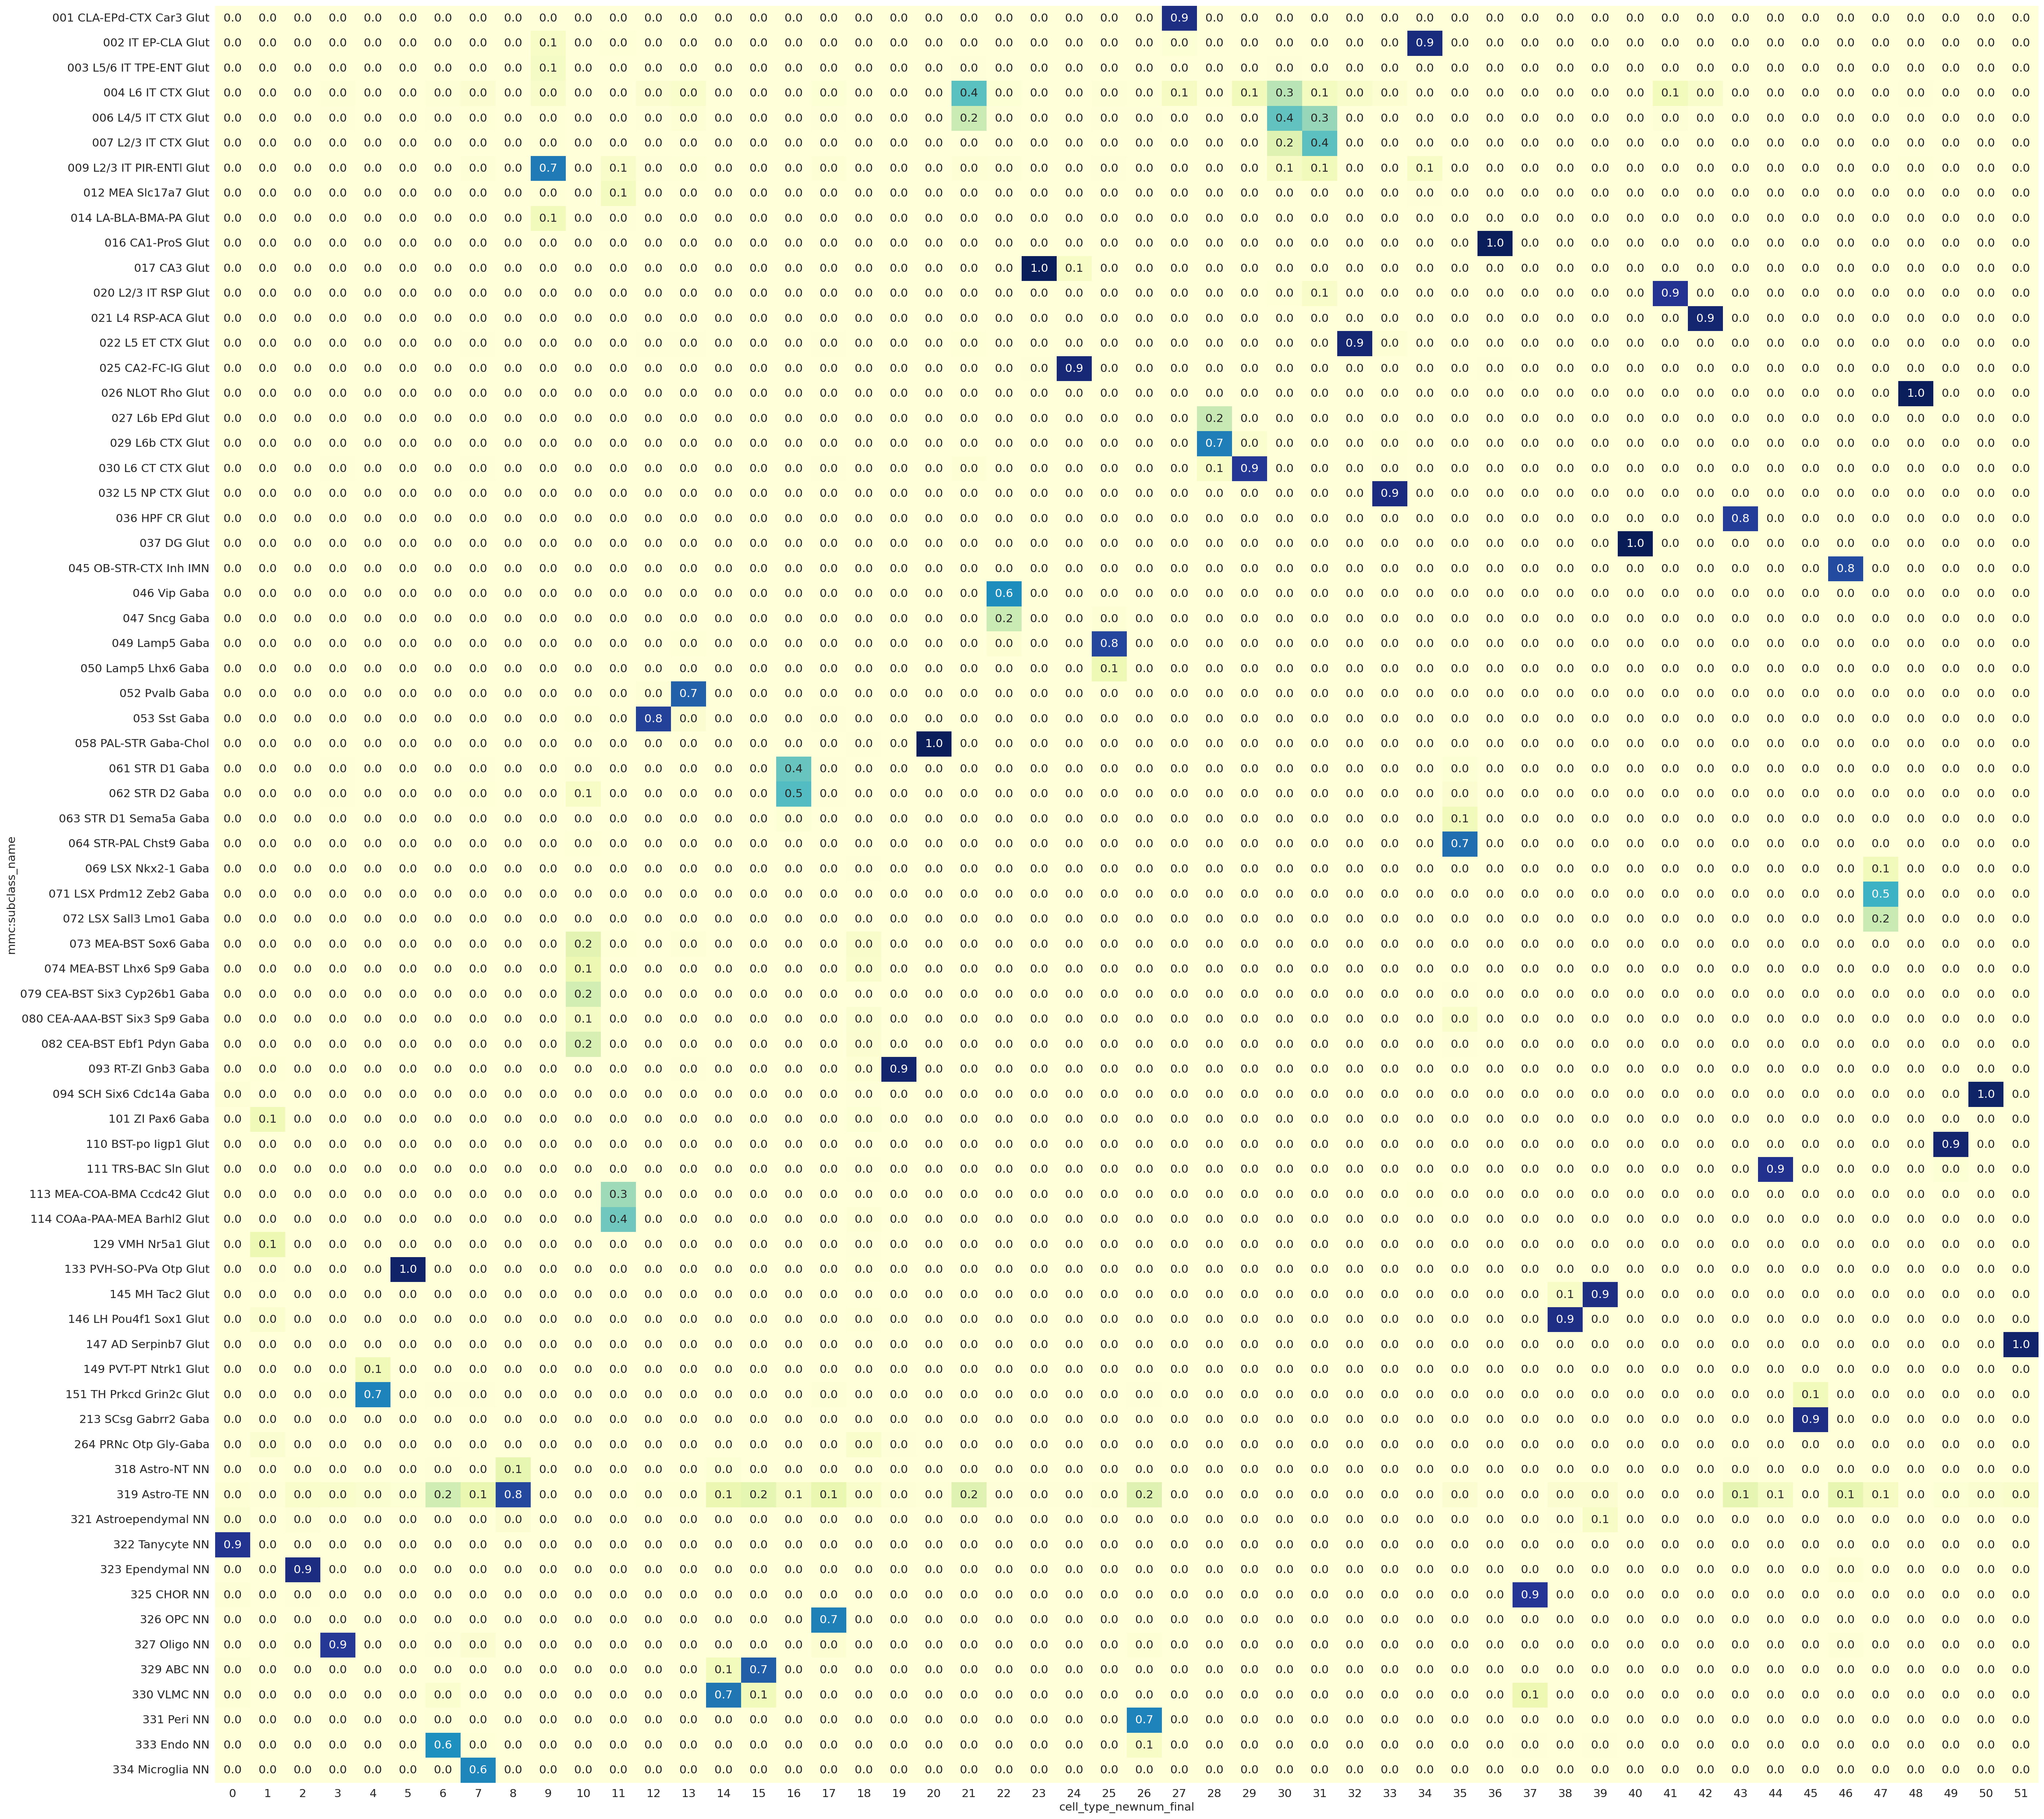

In [17]:
### Correlation map
cont_tab = pd.crosstab(adata_filter.obs[Clusters_to_use], adata_filter.obs['mmc:subclass_name'], normalize="index")
cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 
plt.figure(figsize=(40, 40))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar = False)

In [19]:
### Select a cluster to subcluster
cluster_to_sub = 1

adata_subcluster = adata_filter[adata_filter.obs[Clusters_to_use] == cluster_to_sub]
adata_subcluster.obs[Clusters_to_use].sample() , adata_subcluster.shape

(circa2-ZT01_fmijkaaa-1    1
 Name: cell_type_newnum_final, dtype: int64,
 (43355, 5006))

In [20]:
sc.pp.pca(adata_subcluster)
sc.pp.neighbors(adata_subcluster)
sc.tl.umap(adata_subcluster)

In [21]:
# extract pca coordinates
X_pca = adata_subcluster.obsm['X_pca'] 

### Kmeans clustering
### You can choose the number of clusters by uncommenting n_clusters option
# kmeans = KMeans(#n_clusters=4,
#                 random_state=0).fit(X_pca) 
# adata_subcluster.obs['kmeans'] = kmeans.labels_.astype(str)

sc.tl.leiden(adata_subcluster, resolution = 0.2)

In [22]:
clustering_method = 'leiden'

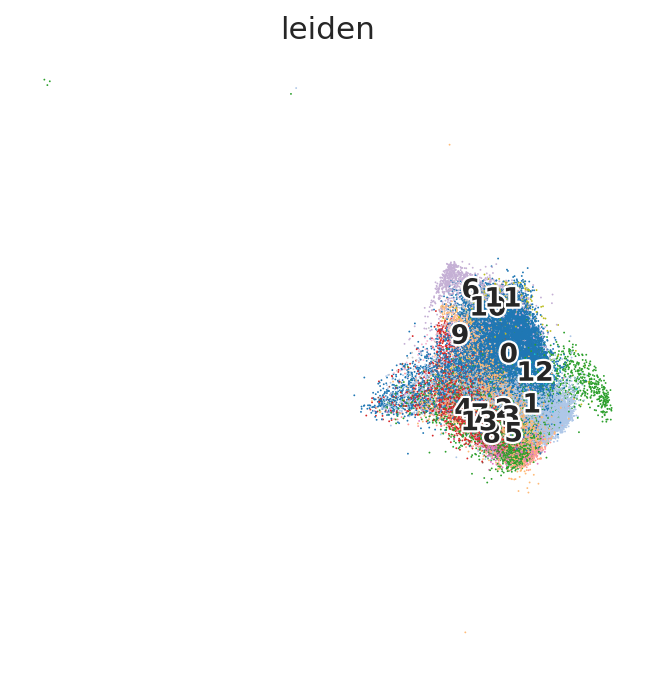

In [23]:
from matplotlib.pyplot import rc_context
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata_subcluster,
        color=clustering_method,
        add_outline=False,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        palette="tab20",
    )
# sc.pl.pca(adata_subcluster,
#          color=clustering_method,
#          palette="tab20",
#          )

In [24]:
### Number of cells per clusters
max_clust = len(adata_subcluster.obs[clustering_method].unique())
for i in range(0, max_clust):
    count = adata_subcluster.obs[clustering_method].value_counts().iloc[i]
    print(f"Cluster {i} : {count} cells")

# adata_subcluster.obs['leiden'].sample(10)

Cluster 0 : 17071 cells
Cluster 1 : 7145 cells
Cluster 2 : 6819 cells
Cluster 3 : 4552 cells
Cluster 4 : 1798 cells
Cluster 5 : 1769 cells
Cluster 6 : 1140 cells
Cluster 7 : 833 cells
Cluster 8 : 832 cells
Cluster 9 : 554 cells
Cluster 10 : 406 cells
Cluster 11 : 312 cells
Cluster 12 : 80 cells
Cluster 13 : 44 cells


<Axes: xlabel='leiden', ylabel='mmc:class_name'>

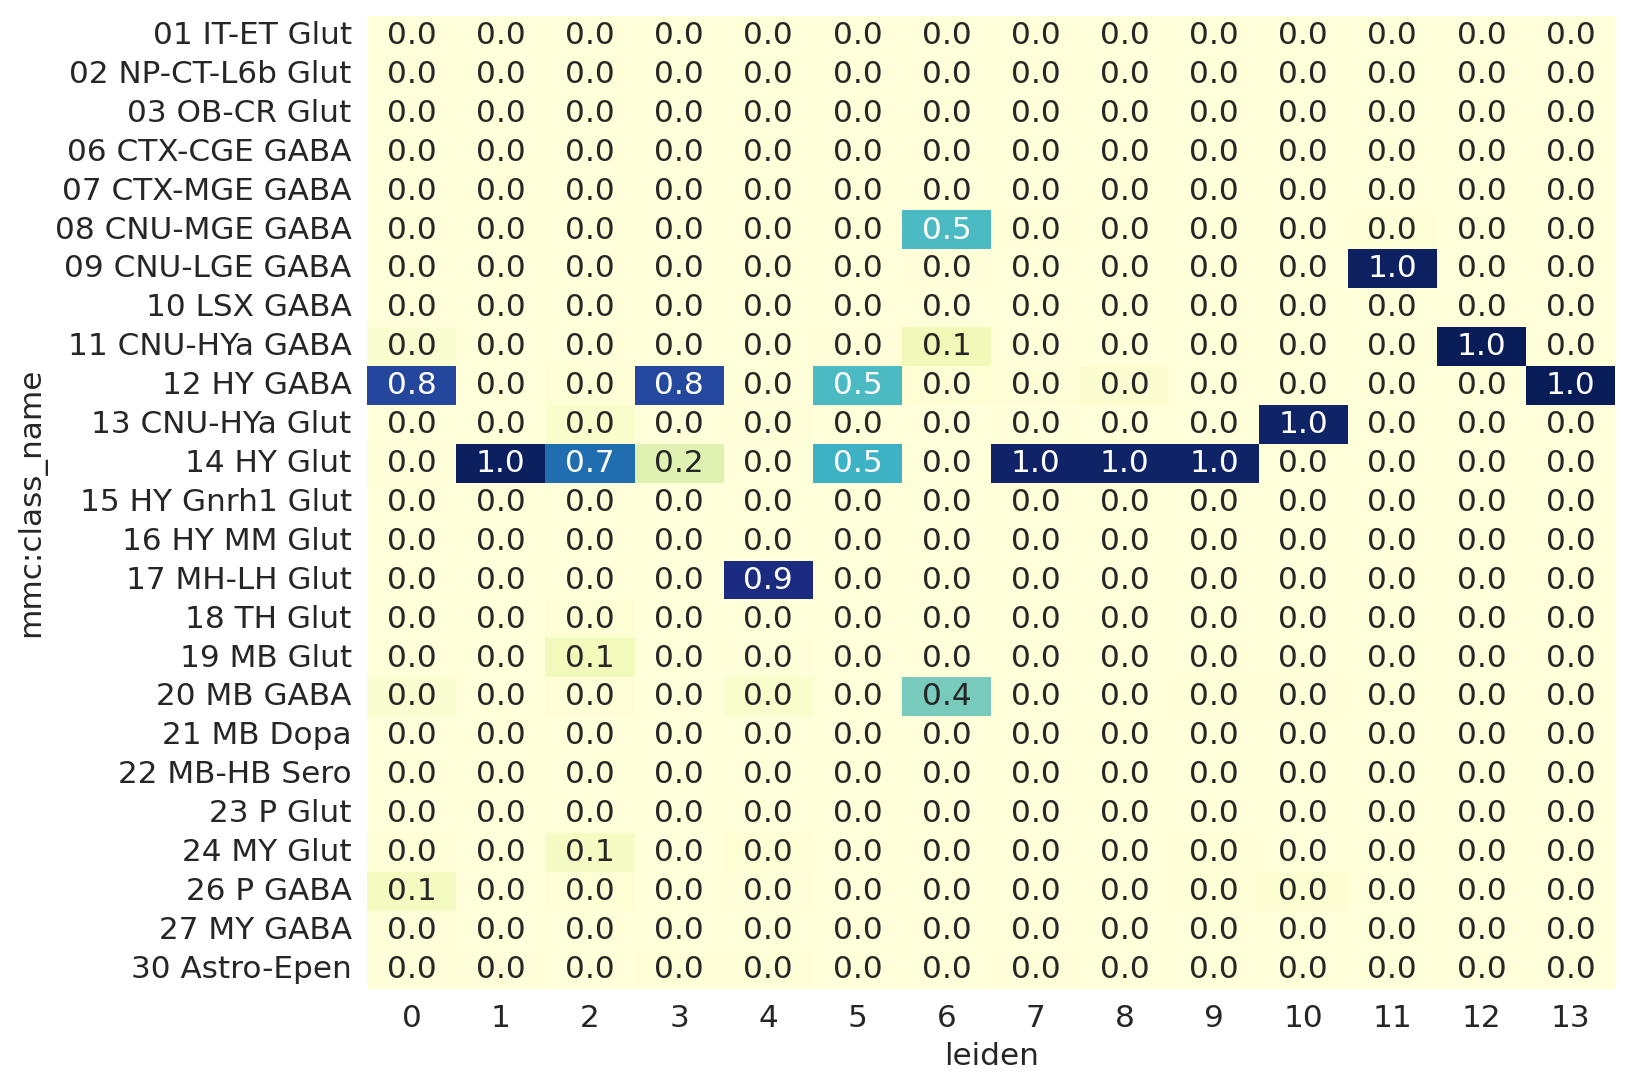

In [25]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_subcluster.obs[clustering_method], adata_subcluster.obs['mmc:class_name'], normalize="index")
plt.figure(figsize=(10, 8))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar=False)

<Axes: xlabel='leiden', ylabel='mmc:subclass_name'>

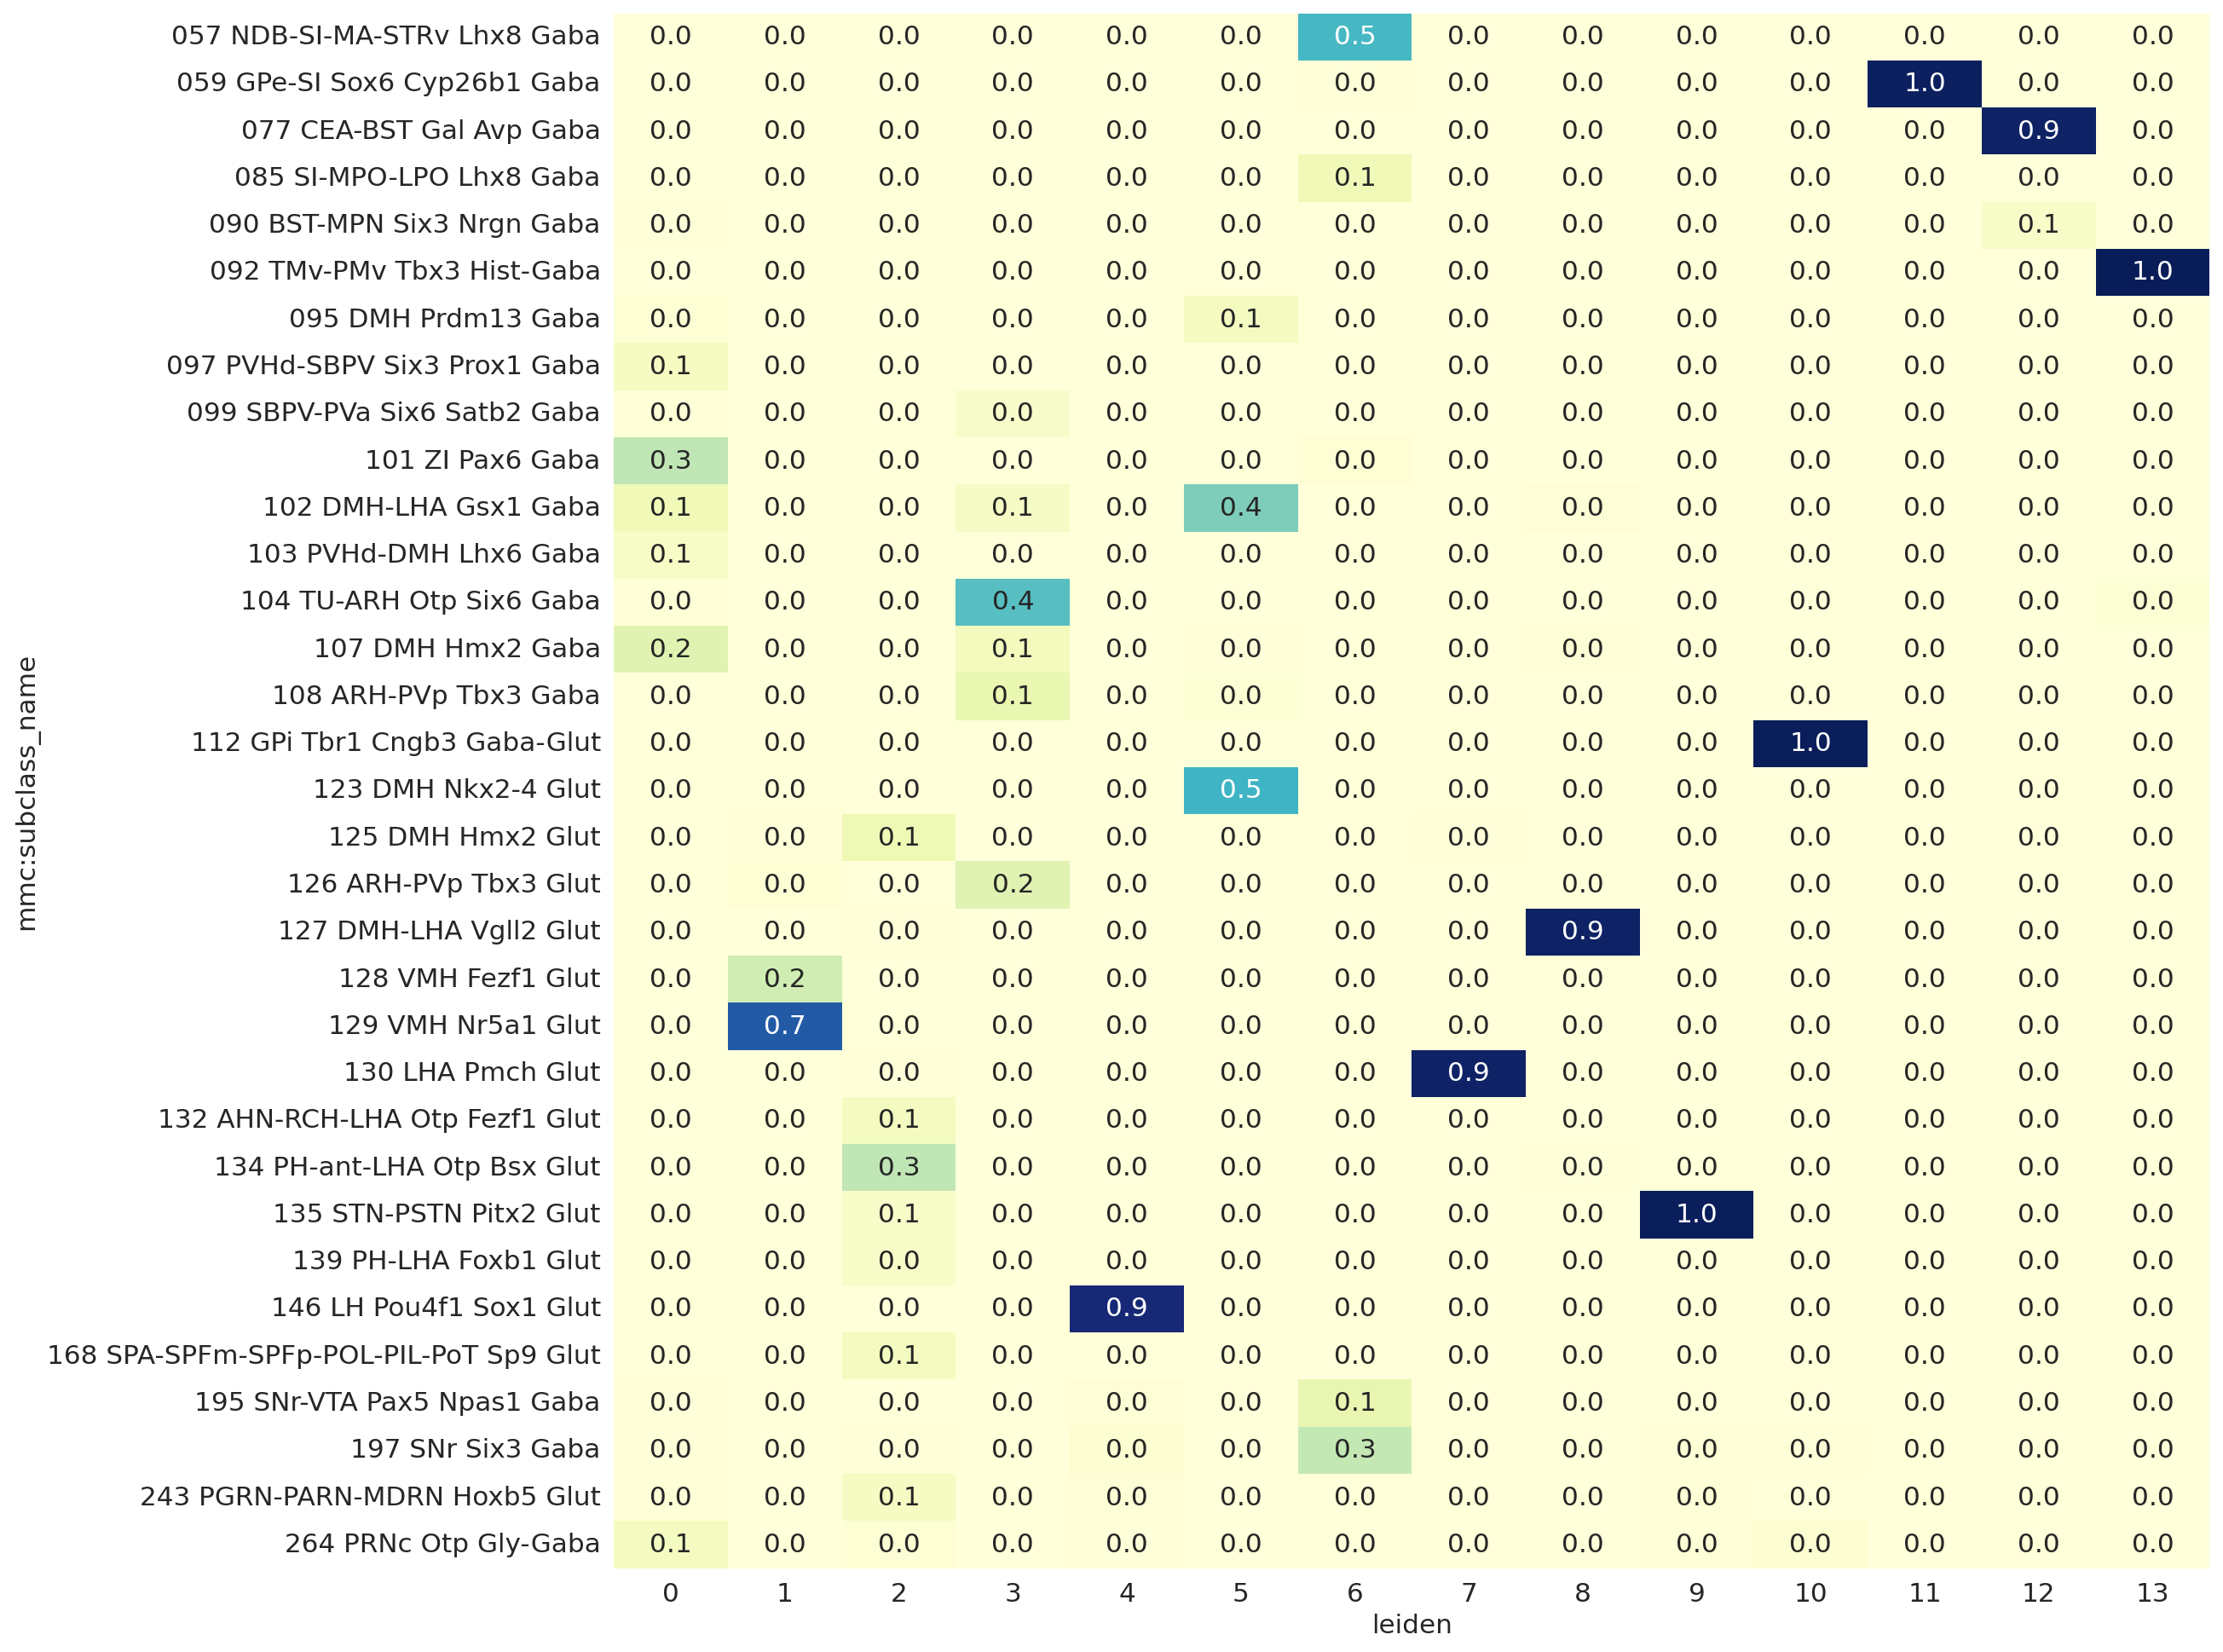

In [26]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_subcluster.obs[clustering_method], adata_subcluster.obs['mmc:subclass_name'], normalize="index")
cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.05]
plt.figure(figsize=(15, 15))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".1f", cbar=False) 

In [27]:
# adata_subcluster.obs[clustering_method] = adata_subcluster.obs[clustering_method].astype(str)
# # sc.tl.dendrogram(adata_subcluster, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
# sc.tl.rank_genes_groups(adata_subcluster, groupby=clustering_method, method="wilcoxon", tie_correct = True, dendrogram = False)
# sc.pl.rank_genes_groups_dotplot(adata_subcluster, groupby=clustering_method, standard_scale="var", n_genes=2, dendrogram = False)

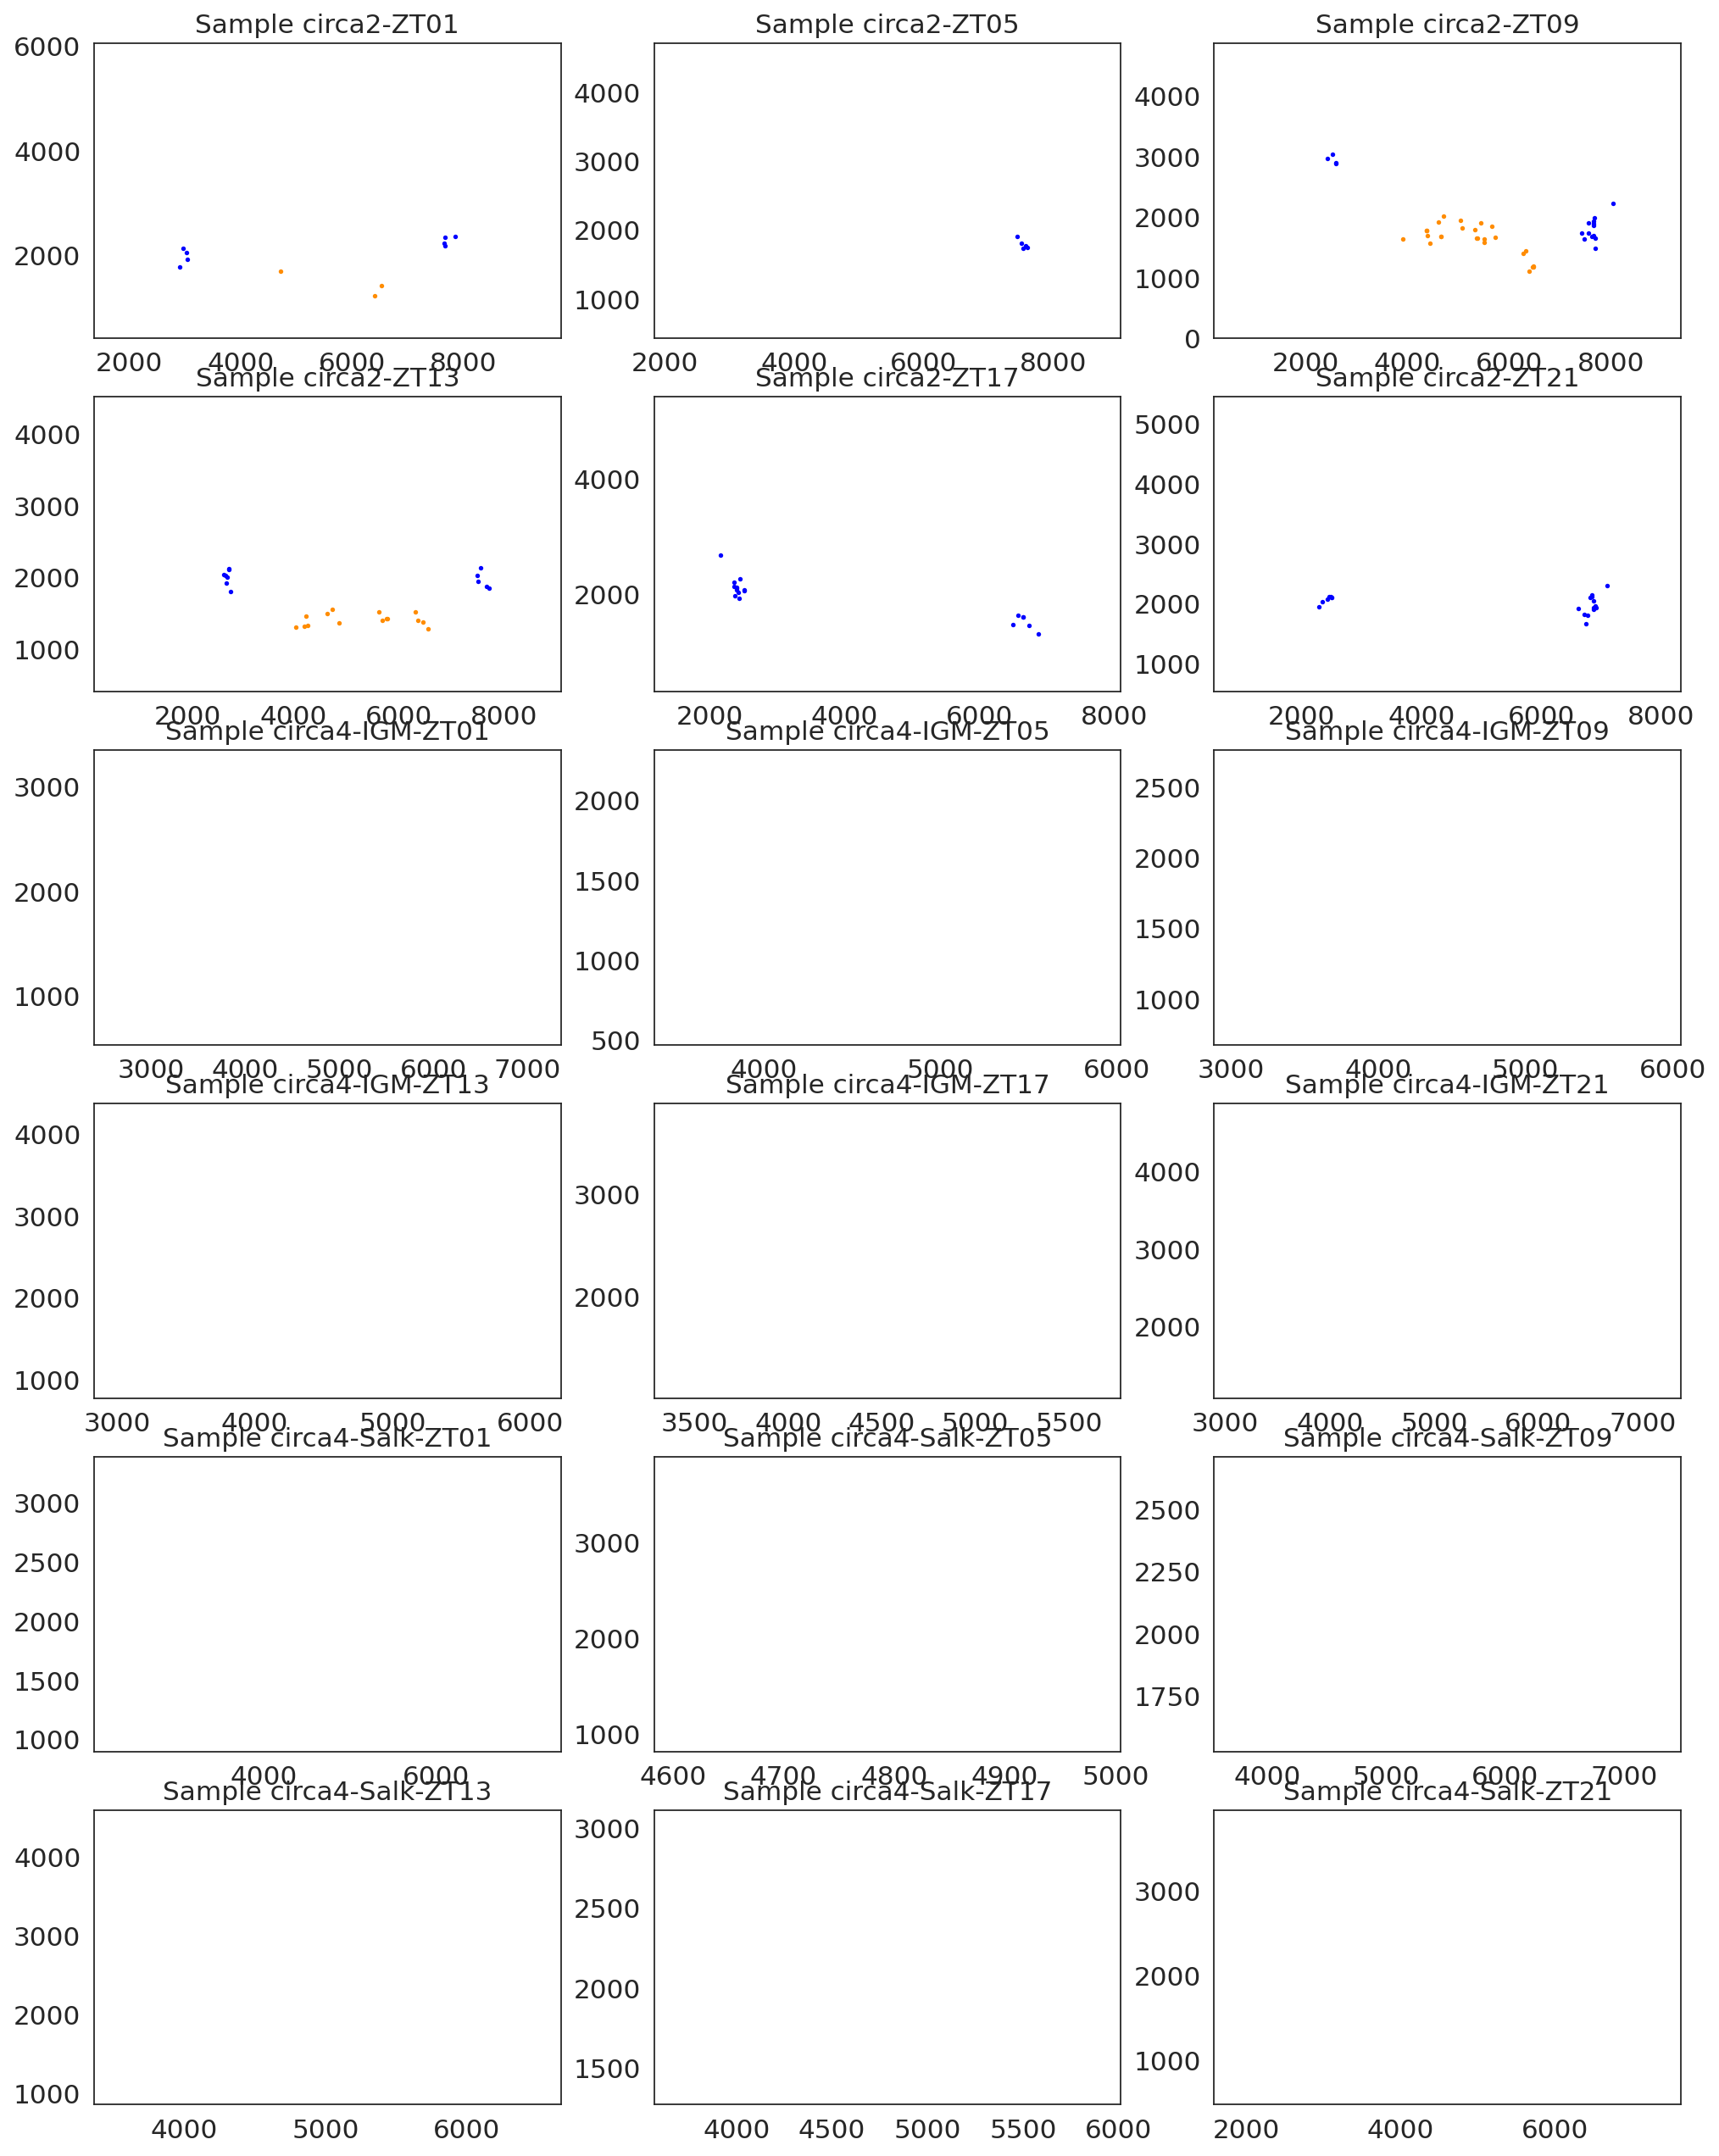

In [35]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata_subcluster.obs[clustering_method] = adata_subcluster.obs[clustering_method].astype(int)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_subcluster.obs[clustering_method].unique())
palette = sns.color_palette("tab20", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_subcluster.obs['kmeans_colors'] = adata_subcluster.obs[clustering_method].apply(lambda x: palette[x])

# Mapping of clusters
fig, axs = plt.subplots(6,3,figsize=(15, 20))
axs = axs.flatten()
clusters_plot = {
    # 0: 'orchid', 1: 'forestgreen', 2: 'black', 3:'red', 
    # 4:'cyan', 5:'blue', 6:'darkorange', 7:'coral',
    # 8:'forestgreen', 9: 'coral',10:'red', 11:'cyan',
    12:'blue',13:'darkorange',14:'black'
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata_subcluster[(adata_subcluster.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[clustering_method].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[clustering_method] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none"
        # colors= cluster_data['kmeans_colors'].unique()[0]
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=2, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")

In [29]:
adata_subcluster.obs['new_cluster'] = clustering_method
adata_subcluster.obs['new_cluster2'] = adata_subcluster.obs[Clusters_to_use].astype("str") + '.' + adata_subcluster.obs[clustering_method].astype("str")
adata_subcluster.obs[['cell_id','new_cluster2']].sample(2)

,cell_id,new_cluster2
circa2-ZT17_dbhjnoem-1,circa2-ZT17_dbhjnoem-1,1.0
circa2-ZT09_dmdidghl-1,circa2-ZT09_dmdidghl-1,1.4


In [36]:
# Use this dictionnary to rename ['cell type'] with the new appropriate cell type for the subcluster. Follow the format. One subcluster at the time.
rename_subclass = {
 f'{cluster_to_sub}.0':'ZI Glut',
f'{cluster_to_sub}.1':'VMH Glut',
f'{cluster_to_sub}.2':'PH Glut',
f'{cluster_to_sub}.3':'ARH Glut',
f'{cluster_to_sub}.4':'LH Glut',
f'{cluster_to_sub}.5':'DMH Glut',
f'{cluster_to_sub}.6':'HY Gaba',
f'{cluster_to_sub}.7':'LHA Glut',
f'{cluster_to_sub}.8' :'DMH Glut',
f'{cluster_to_sub}.9' :'STN Glut',
f'{cluster_to_sub}.10':'GP Glut',
f'{cluster_to_sub}.11':'GP Gaba',
f'{cluster_to_sub}.12':'BST Gaba',
f'{cluster_to_sub}.13':'HY Gaba',
f'{cluster_to_sub}.14':'',
f'{cluster_to_sub}.15':'',
f'{cluster_to_sub}.16':'',
f'{cluster_to_sub}.17':'',
}

adata_subcluster.obs['cell_type_final'] = adata_subcluster.obs['new_cluster2'].map(rename_subclass)

# Create a dictionary to map old values to new values
mapping_dict = dict(zip(adata_subcluster.obs['cell_id'], adata_subcluster.obs['cell_type_final']))

# Use .map() function to rename cell contents in 'col1' based on mapping dictionary
adata.obs['cell_type_final'] = adata.obs.apply(lambda x: mapping_dict[x['cell_id']] if x['cell_id'] in mapping_dict else x['cell_type_final'],axis = 1)

In [ ]:
adata.obs["cell_type_final"].sample(5)


In [43]:
adata.obs['cell_type_final'].value_counts().sort_index()

cell_type_final
ABC                       17463
AD Glut                    1215
AHN RCH LHA Glut         125670
AMY Gaba                  13812
AMY Glut                  19640
ARH Glut                   4552
Astro TE                 297845
BST Gaba                     80
BST po Glut                1749
CA1 ProS Glut             11591
CA2 FC IG Glut             3752
CA3 Glut                   9639
CLA EPd CTX Glut          12309
Choroid                   21087
DG Glut                   31793
DMH Glut                   2601
Endothelial              223489
Ependymal                 32863
GP Gaba                     312
GP Glut                     406
HPF CR Glut                 847
HY Gaba                    1184
IT EP CLA Glut              294
L2 3 IT CTX Glut          29376
L2 3 IT PIR ENTl Glut     75685
L2 3 IT RSP Glut           5317
L4 5 IT CTX Glut          99428
L4 RSP ACA Glut            1368
L5 ET CTX Glut            17774
L5 NP CTX Glut             8074
L6 CT CTX Glut          

In [40]:
adata = adata[adata.obs['cell_type_final'] != 'Undefined']

<font size="6"><span style="color:red">From here, go back to process the other cluster if needed </span></font>

## File Save (and load)

In [ ]:
all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

In [ ]:
# adata.obs.groupby('cell_type_final')['cell_type_final'].count().sort_values()
adata.obs['cell_type_final'].value_counts()

In [61]:
if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])
    # adata.obs = adata.obs.drop(columns=['cell_class_auto_sub'])


adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz", compression='gzip')
# adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.csv.gz", compression='gzip')
adata.obs.to_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.parquet")

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")

In [55]:
adata.obs['cell_type_final'].unique()

['Tanycyte', 'ARH Glut', 'ZI Glut', 'VMH Glut', 'Ependymal', ..., 'LSX Gaba', 'NLOT Glut', 'BST po Glut', 'SCH Gaba', 'AD Glut']
Length: 62
Categories (62, object): ['ABC', 'AD Glut', 'AHN RCH LHA Glut', 'AMY Gaba', ..., 'VLMC', 'VMH Glut', 'Vip Gaba', 'ZI Glut']

# Automap

## Data pre-processing

In [62]:
# testdf = pd.read_csv('Xenium-data-coordinates-CTX.csv')
testdf = pd.read_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.parquet")
testdf.shape

testdf = testdf.filter(['cell_id','sample','x_centroid','y_centroid','cell_type_final','cell_type_newnum_final'], axis=1)
### Only keep necessary columns

In [63]:
testdf.sample()

,cell_id,sample,x_centroid,y_centroid,cell_type_final,cell_type_newnum_final
circa2-ZT01_nonlphmg-1,circa2-ZT01_nonlphmg-1,circa2-ZT01,4943.021484,4127.699707,TH Glut,8


In [64]:
testdf['cell_type_final'].unique()

['Tanycyte', 'ARH Glut', 'ZI Glut', 'VMH Glut', 'Ependymal', ..., 'LSX Gaba', 'NLOT Glut', 'BST Glut', 'SCH Gaba', 'AD Glut']
Length: 62
Categories (62, object): ['ABC', 'AD Glut', 'AHN RCH LHA Glut', 'AMY Gaba', ..., 'VLMC', 'VMH Glut', 'Vip Gaba', 'ZI Glut']

In [74]:
# Simplify names for mapping
rename_subclass = {
 'Oligo': 'Undefined',
 'Oligodendrocyte': 'Undefined',
 'Astro': 'Undefined',
 'Astro TE': 'Undefined',
 'Astro NT': 'Undefined',
 'ABC': 'Undefined',
 'Endo': 'Undefined',
 'Endothelial': 'Undefined',
 'OPC': 'Undefined',
 'Pericyte': 'Undefined',
 'Tanycyte': 'Ependymal',
 'Microglia': 'Undefined',
 'Undefined': 'Undefined',
 'CHOR': 'Undefined',
 'HPF CR': 'Undefined',
 'HY GABA': 'HY',
 'HY Glut': 'HY',
 'RT ZI GABA': 'HY',
 'RT ZI': 'HY',
 'SO Glut': 'HY',
 'AHN Glut': 'HY',
 'AHN': 'HY',
 'LHA Glut': 'HY',
 'PVH Glut': 'HY',
 'HY Gaba': 'HY',
 'Mix HY': 'HY',
 'VMH Glut': 'VMH',
 'AMY GABA': 'AMY',
 'AMY Glut': 'AMY',
 'TH Glut': 'TH',
 'PVT Glut': 'TH',
 'PVT': 'TH',
 'AD': 'TH',
 'MB GABA': 'MB',
 'MB DOPA': 'MB',
 'MB Dopa': 'MB',
 'MB Glut': 'MB',
 'L4 5 IT CTX': 'CTX',
 'L5 IT CTX': 'CTX',
 'L2 3 IT PIR ENTI': 'CTX',
 'L5 6 IT TPE ENT': 'CTX',
 'L2 3 IT CTX': 'CTX',
 'L5 ET CTX': 'CTX',
 'L2 3 IT': 'CTX',
 'L6 IT CTX': 'CTX',
 'L6 CT CTX': 'CTX',
 'L5 NP CTX': 'CTX',
 'L4 RSP ACA': 'CTX',
 'L4 5 IT Glut': 'CTX',
 'L2 3 4 5 IT CTX': 'CTX',
 'L2 3 IT RSP': 'CTX',
 'L5 CTX': 'CTX',
 'L6 CTX': 'CTX',
 'L2 3 CTX': 'CTX',
 'L4 5 CTX': 'CTX',
 'L6b CTX': 'CTX',
 'L2 3 IT PIT ENTI': 'CTX',
 'Mix Cortex': 'CTX',
 'NP': 'CTX',
 'CLA EPd CTX Glut': 'CTX',
 'IT EP CLA': 'CTX',
 'CLA': 'CTX',
 'CLA EP': 'CTX',
 'interneurons GABA': 'Undefined',
 'interneurons': 'Undefined',
 'Sncg Gaba': 'Undefined',
 'Pvalb Gaba': 'Undefined',
 'Vip Gaba': 'Undefined',
 'Sst Gaba': 'Undefined',
 'Lamp5 Gaba': 'Undefined',
 'NLOT Glut': 'NLOT',
 'STR D1D2 GABA': 'STR',
 'STR GABA': 'STR',
 'STR D1D2': 'STR',
 'STRv': 'STR',
 'GPe GABA': 'GPe',
 'STRv GABA': 'STRv',
 'BST GABA': 'BST',
 'GP GABA': 'PAL',
 'STR PAL Gaba': 'STR',
 'TRS BAC Glut': 'TRS',
 'LSX GABA': 'LSX',
 'NP SUB': 'HIPP',
 'CA1 ProS': 'HIPP',
 'CA3': 'HIPP',
 'DG': 'HIPP',
 'DG Glut': 'HIPP',
 'SUB ProS': 'HIPP',
 'NP SUB Glut': 'HIPP',
 'CA1 ProS Glut': 'HIPP',
 'CA3 Glut': 'HIPP',
 'CA2 FC IG Glut': 'HIPP',
 'SUB ProS Glut': 'HIPP',
 'ARH GABA': 'ARH',
 'PF Glut': 'MB',
 'LA Glut': 'AMY',
 'MEA Glut': 'AMY',
 'ZI Gaba': 'HY',
 'STRv PAL Gaba': 'STRv',
 'L23 PIR ENTl Glut': 'CTX',
 'L4 CTX Glut': 'CTX',
 'L23 CTX Glut': 'CTX',
 'L5 CTX Glut': 'CTX',
 'STR D1D2 Gaba': 'STR',
 'L6b CTX Glut': 'CTX',
 'L6 CTX Glut': 'CTX',
 'MEA Gaba': 'AMY',
 'MH Glut': 'MH',
 'LH Glut': 'LH',
 'L23 RSP Glut': 'CTX',
 'STR Gaba': 'STR',
 'BST Gaba': 'BST',
 'SC Glut': 'SC',
 'MM Glut': 'MM',
 'SCH Gaba': 'SCH',
 'LSX Gaba': 'LSX',
 'SC Gaba': 'MB',
 'LGv Gaba': 'MB',
 'APN Glut': 'TH',
 'AV Glut': 'HY',
 'PRT Gaba': 'MB',
 'BST Glut': 'BST',
 'AD Glut': 'HY',
 'SN Gaba': 'MB',
 'Pineal Glut': 'MB',
 'SN Dopa': 'MB',
 'PAG Glut': 'MB',
 'BST': 'HY',
 'ARH Glut': 'ARH',
 'L2 3 IT PIR ENTl Glut': 'CTX',
 'AMY Gaba': 'AMY',
 'CLA EPd Glut': 'CTX',
 'PAL STR Gaba': 'STRv',
 'L6 IT CTX Glut': 'CTX',
 'L2345 IT CTX Glut': 'CTX',
 'L6 CT CTX Glut': 'CTX',
 'L2 3 IT RSP Glut': 'CTX',
 'L4 RSP ACA Glut': 'CTX',
 'OB CR Glut': 'HIPP',
 'PVH SO PVa Glut': 'HY',
 'AHN RCH LHA Glut': 'HY',
 'RT ZI Gaba': 'HY',
 'PAL STR Gaba Chol': 'PAL',
 'L4 5 IT CTX Glut': 'CTX',
 'L2 3 IT CTX Glut': 'CTX',
 'L5 ET CTX Glut': 'CTX',
 'L5 NP CTX Glut': 'CTX',
 'IT EP CLA Glut': 'CTX',
 'Choroid': 'Undefined',
 'LH': 'TH',
 'MH': 'TH',
 'HPF CR Glut': 'HIPP',
 'MB Gaba': 'MB',
 'OB STR CTX Inh IMN': 'HIPP',
 'BST po Glut': 'BST',
 'ZI Glut': 'HY',
 'DMH Glut': 'HY',
 'PH Glut': 'HY',
 'GP Glut': 'STR',
 'GP Gaba': 'STR',
 'STN Glut': 'HY Glut'
 }

testdf['cell_type_final'] = testdf['cell_type_final'].apply(lambda x: rename_subclass[x] if x in rename_subclass else x)
testdf = testdf[testdf['cell_type_final'] != 'Undefined']
testdf = testdf[testdf['cell_type_final'] != 'undefined']
testdf['cell_type_final'].unique()

array(['Ependymal', 'ARH', 'HY', 'VMH', 'TH', 'CTX', 'AMY', 'VLMC', 'STR',
       'PAL', 'HIPP', 'TRS', 'MB', 'LSX', 'NLOT', 'SCH'], dtype=object)

In [75]:
sample_ids = testdf['sample'].unique()
sample_ids

['circa2-ZT01', 'circa2-ZT05', 'circa2-ZT09', 'circa2-ZT13', 'circa2-ZT17', ..., 'circa4-Salk-ZT05', 'circa4-Salk-ZT09', 'circa4-Salk-ZT13', 'circa4-Salk-ZT17', 'circa4-Salk-ZT21']
Length: 18
Categories (18, object): ['circa2-ZT01', 'circa2-ZT05', 'circa2-ZT09', 'circa2-ZT13', ..., 'circa4-Salk-ZT09', 'circa4-Salk-ZT13', 'circa4-Salk-ZT17', 'circa4-Salk-ZT21']

In [77]:
from module.automap import knn_mst_clustering
from module.automap import assign_chunk_labels
from module.automap import fill_any_chunks,fill_empty_chunks
from module.automap import grid_to_geojson_with_scaling
import json


count = 0
for sample_to_map in sample_ids:

    count +=1
    print(f'{datetime.now()}: automap of {sample_to_map} ({count}/{len(samples_ids)})')

    df = testdf[testdf['sample']==sample_to_map]
    all_cell_type = df['cell_type_final'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    df['cell_type_newnum_final'] = df['cell_type_final'].map(mapping_dict)

    # Multiply centroid coordinates by 10 to convert to pixel coordinates
    df['x_pixel'] = df['x_centroid'] * 10
    df['y_pixel'] = df['y_centroid'] * 10

    ### Generate a color palette for the clusters - to make color stay consistent across samples
    df['cell_type_newnum_final'] = df['cell_type_newnum_final'].astype(str)

    ### Establish neighbors classifiers

    K = 10
    X = df[['x_pixel', 'y_pixel']].values
    y = df['cell_type_newnum_final'].astype(int).values
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X, y)
    df['knn_celltype'] = knn.predict(X)

    data = df
    valid_celltypes = data['knn_celltype'].value_counts()[data['knn_celltype'].value_counts() > 100].index
    data = data[data['knn_celltype'].isin(valid_celltypes)]
    unique_cell_types = sorted(data['knn_celltype'].unique())

    for cell_type in unique_cell_types:
        print(f"Processing cell type {cell_type}...")
        knn_mst_clustering(data, cell_type=cell_type, k=10)

    # Save the updated dataframe with cluster labels
    # data.to_csv('Xenium-data-coordinates-CTX-labeled.csv', index=False)
    print("Data with cluster labels saved.")

    data['knn_celltype'].value_counts()
    data['cluster_label'].isna().sum()

    # Get the value counts of each category
    value_counts = data['cluster_label'].value_counts()

    # Create a mapping based on the rank of value counts
    mapping_drg = {label: idx for idx, label in enumerate(value_counts.index, 1)}

    # Map the categorical strings to numbers based on the value counts
    data['cluster_label_numeric'] = data['cluster_label'].map(mapping_drg)
    data['cluster_label_numeric'].unique()
    data = data.dropna(subset=['cluster_label_numeric'])
    data['cluster_label_numeric'].isna().sum()

    ### Pixelize section and assign label
    chunk_size = 400  # Example chunk size
    threshold = 0.5  # Example threshold
    grid, x_bins, y_bins = assign_chunk_labels(data, chunk_size, threshold)


    filled_grid, x_bins, y_bins = fill_empty_chunks(grid, x_bins, y_bins, 4)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 4)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,4)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 2)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 2)
    filled_grid, x_bins, y_bins = fill_empty_chunks(filled_grid, x_bins, y_bins, 3)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,4)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,3)
    filled_grid, x_bins, y_bins = fill_any_chunks(filled_grid, x_bins, y_bins,3)

    # Create the mapping as before
    mapping = data.groupby('knn_celltype')['cell_type_final'].agg(lambda x: x.value_counts().idxmax()).to_dict()

    # Create a new column 'knn_celltype_label' using the mapping
    data['knn_celltype_label'] = data['knn_celltype'].map(mapping)
    data['cell_type_newnum_final'] = data['cell_type_newnum_final'].astype(int)

    # Display the dataframe to verify
    display(data[['knn_celltype', 'knn_celltype_label']].sample(3))

    ### Export geojson
    value_counts = data[['knn_celltype', 'cell_type_final']].value_counts()
    value_counts_df = value_counts.reset_index(name='count')
    most_common_pairs = value_counts_df.groupby('knn_celltype').apply(lambda x: x.nlargest(1, 'count'))
    celltype_to_newnum = most_common_pairs.set_index('knn_celltype')['cell_type_final'].to_dict()
    celltype_to_newnum = {key + 1: value for key, value in celltype_to_newnum.items()}

    geojson_data = grid_to_geojson_with_scaling(filled_grid, x_bins, y_bins, celltype_to_newnum, scale_factor=10)

    # Save the GeoJSON to a file
    with open(f'{dir_notebook}/coordinates/Region_prediction/Xenium-data-coordinates-filtered_{sample_to_map}.geojson', 'w') as f:
        json.dump(geojson_data, f, indent=2)


print(f'{datetime.now()}: automap done')




2025-04-28 20:56:09.241359: automap of circa2-ZT01 (1/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 10...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa2-ZT01_abblofko-1,2,HY
circa2-ZT01_jekpdgmp-1,2,HY
circa2-ZT01_likoofbh-1,4,TH


2025-04-28 20:56:57.408093: automap of circa2-ZT05 (2/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa2-ZT05_ddpnedpm-1,2,HIPP
circa2-ZT05_cgcinjia-1,3,STR
circa2-ZT05_cnfhpmal-1,0,CTX


2025-04-28 20:57:39.038762: automap of circa2-ZT09 (3/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa2-ZT09_lniopieo-1,0,CTX
circa2-ZT09_flmahdmf-1,8,VMH
circa2-ZT09_nbihklfb-1,4,STR


2025-04-28 20:58:26.061582: automap of circa2-ZT13 (4/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 10...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa2-ZT13_dnpeobdk-1,10,HIPP
circa2-ZT13_ennlchab-1,6,HY
circa2-ZT13_knnkmlgn-1,0,CTX


2025-04-28 20:59:13.084440: automap of circa2-ZT17 (5/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa2-ZT17_difklodp-1,6,STR
circa2-ZT17_iplfgaih-1,0,CTX
circa2-ZT17_bdgilpdi-1,3,AMY


2025-04-28 20:59:51.733303: automap of circa2-ZT21 (6/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa2-ZT21_bngmcdoj-1,2,AMY
circa2-ZT21_bohmefmc-1,2,AMY
circa2-ZT21_ccpjaimc-1,4,HY


2025-04-28 21:00:35.619427: automap of circa4-IGM-ZT01 (7/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 9...
Processing cell type 10...
Processing cell type 11...
Processing cell type 12...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-IGM-ZT01_lfjckkjo-1,4,STR
circa4-IGM-ZT01_gnolpfae-1,5,CTX
circa4-IGM-ZT01_indphnog-1,0,HY


2025-04-28 21:01:22.892890: automap of circa4-IGM-ZT05 (8/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Processing cell type 11...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-IGM-ZT05_bhckhdkc-1,0,CTX
circa4-IGM-ZT05_jieocjfj-1,0,CTX
circa4-IGM-ZT05_ejeiinao-1,5,HY


2025-04-28 21:02:08.071949: automap of circa4-IGM-ZT09 (9/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 6...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Processing cell type 11...
Processing cell type 12...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-IGM-ZT09_dmmmbpgl-1,1,STR
circa4-IGM-ZT09_hhimaalp-1,3,HY
circa4-IGM-ZT09_adjhioff-1,0,CTX


2025-04-28 21:02:51.756654: automap of circa4-IGM-ZT13 (10/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 10...
Processing cell type 11...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-IGM-ZT13_jlahjllc-1,4,STR
circa4-IGM-ZT13_hkciekni-1,0,CTX
circa4-IGM-ZT13_nfjljnak-1,1,AMY


2025-04-28 21:03:35.630034: automap of circa4-IGM-ZT17 (11/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Processing cell type 11...
Processing cell type 12...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-IGM-ZT17_kkglpied-1,4,HY
circa4-IGM-ZT17_fhcmeloj-1,7,SCH
circa4-IGM-ZT17_haencofo-1,0,VLMC


2025-04-28 21:04:18.777055: automap of circa4-IGM-ZT21 (12/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-IGM-ZT21_ejhdgbep-1,2,HY
circa4-IGM-ZT21_lommjepo-1,0,CTX
circa4-IGM-ZT21_gcabfloc-1,2,HY


2025-04-28 21:05:10.021204: automap of circa4-Salk-ZT01 (13/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 9...
Processing cell type 10...
Processing cell type 12...
Processing cell type 13...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-Salk-ZT01_mgpkkncf-1,3,HY
circa4-Salk-ZT01_hlimmehp-1,1,CTX
circa4-Salk-ZT01_anjgndmh-1,1,CTX


2025-04-28 21:05:58.317072: automap of circa4-Salk-ZT05 (14/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Processing cell type 11...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-Salk-ZT05_jcmmcgag-1,5,TH
circa4-Salk-ZT05_njhhpifo-1,1,STR
circa4-Salk-ZT05_cnjcjlbk-1,9,HIPP


2025-04-28 21:06:41.452850: automap of circa4-Salk-ZT09 (15/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Processing cell type 11...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-Salk-ZT09_oceadedj-1,0,CTX
circa4-Salk-ZT09_aejgbapn-1,6,Ependymal
circa4-Salk-ZT09_mejblbig-1,3,HY


2025-04-28 21:07:28.774269: automap of circa4-Salk-ZT13 (16/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-Salk-ZT13_llnpljki-1,0,CTX
circa4-Salk-ZT13_gpklepdg-1,0,CTX
circa4-Salk-ZT13_kffgnhmb-1,2,STR


2025-04-28 21:08:15.702418: automap of circa4-Salk-ZT17 (17/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 6...
Processing cell type 7...
Processing cell type 8...
Processing cell type 9...
Processing cell type 10...
Processing cell type 11...
Processing cell type 12...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-Salk-ZT17_chacmdjh-1,1,CTX
circa4-Salk-ZT17_monfapkg-1,8,TH
circa4-Salk-ZT17_cglapdik-1,1,CTX


2025-04-28 21:09:01.862948: automap of circa4-Salk-ZT21 (18/18)
Processing cell type 0...
Processing cell type 1...
Processing cell type 2...
Processing cell type 3...
Processing cell type 4...
Processing cell type 5...
Processing cell type 6...
Processing cell type 7...
Processing cell type 9...
Processing cell type 10...
Data with cluster labels saved.


,knn_celltype,knn_celltype_label
circa4-Salk-ZT21_dgmpcafb-1,5,TH
circa4-Salk-ZT21_mpemdkjf-1,0,CTX
circa4-Salk-ZT21_jfdjacbf-1,4,HY


2025-04-28 21:09:46.416935: automap done


## Match cells with automatically generated regions

### Data pre-processing

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")

In [78]:
samples_ids = adata.obs['sample'].unique()
samples_ids

['circa2-ZT01', 'circa2-ZT05', 'circa2-ZT09', 'circa2-ZT13', 'circa2-ZT17', ..., 'circa4-Salk-ZT05', 'circa4-Salk-ZT09', 'circa4-Salk-ZT13', 'circa4-Salk-ZT17', 'circa4-Salk-ZT21']
Length: 18
Categories (18, object): ['circa2-ZT01', 'circa2-ZT05', 'circa2-ZT09', 'circa2-ZT13', ..., 'circa4-Salk-ZT09', 'circa4-Salk-ZT13', 'circa4-Salk-ZT17', 'circa4-Salk-ZT21']

In [79]:
count = 0
combine_dict = {}

for sample_to_map in samples_ids:
    count += 1
    print(f'{datetime.now()}: mapping of {sample_to_map} ({count}/{len(samples_ids)})')
    geojson  = gpd.read_file(f'{dir_notebook}/coordinates/Region_prediction/Xenium-data-coordinates-filtered_{sample_to_map}.geojson')
    geojson['geometry'][1]
    adata_sub = adata[adata.obs['sample'] == sample_to_map]

    ### Cell mapping
    centroid_gdp = gpd.GeoDataFrame(adata_sub.obs, geometry=gpd.points_from_xy(adata_sub.obs.x_centroid, adata_sub.obs.y_centroid))
    centroid_gdp.index.name = None
    centroid_gdp.crs = 'EPSG:4326'
    matched_cells = gpd.sjoin(centroid_gdp, geojson, predicate='within', how='left')

    mapping_dict_reg = dict(zip(matched_cells['cell_id'], matched_cells['cell_type_newnum_final_right']))
    adata_sub.obs['region_automap'] = adata_sub.obs['cell_id'].map(mapping_dict_reg)

    all_cell_type = adata_sub.obs['region_automap'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    adata_sub.obs['region_automap_newnum'] = adata_sub.obs['region_automap'].map(mapping_dict)

    mapping_dict_reg = dict(zip(adata_sub.obs['cell_id'], adata_sub.obs['region_automap']))
    combine_dict.update(mapping_dict_reg)
    
print(f'{datetime.now()}: dict done')
adata.obs['region_automap_name'] = adata.obs['cell_id'].map(combine_dict)

if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])

adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz", compression = 'gzip')

# adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.csv.gz",
#          compression={'method': 'gzip'})


2025-04-28 21:09:46.444636: mapping of circa2-ZT01 (1/18)
2025-04-28 21:09:47.971486: mapping of circa2-ZT05 (2/18)
2025-04-28 21:09:48.875740: mapping of circa2-ZT09 (3/18)
2025-04-28 21:09:50.018763: mapping of circa2-ZT13 (4/18)
2025-04-28 21:09:51.597137: mapping of circa2-ZT17 (5/18)
2025-04-28 21:09:52.724922: mapping of circa2-ZT21 (6/18)
2025-04-28 21:09:54.198796: mapping of circa4-IGM-ZT01 (7/18)
2025-04-28 21:09:55.183205: mapping of circa4-IGM-ZT05 (8/18)
2025-04-28 21:09:56.056545: mapping of circa4-IGM-ZT09 (9/18)
2025-04-28 21:09:57.346413: mapping of circa4-IGM-ZT13 (10/18)
2025-04-28 21:09:58.269103: mapping of circa4-IGM-ZT17 (11/18)
2025-04-28 21:09:59.547209: mapping of circa4-IGM-ZT21 (12/18)
2025-04-28 21:10:00.437542: mapping of circa4-Salk-ZT01 (13/18)
2025-04-28 21:10:01.189984: mapping of circa4-Salk-ZT05 (14/18)
2025-04-28 21:10:02.457654: mapping of circa4-Salk-ZT09 (15/18)
2025-04-28 21:10:03.183791: mapping of circa4-Salk-ZT13 (16/18)
2025-04-28 21:10:04.0

In [80]:
all_cell_type = adata.obs['region_automap_name'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['region_automap_num'] = adata.obs['region_automap_name'].map(mapping_dict)
mapping_dict

{'Ependymal': 0,
 'ARH': 1,
 'VMH': 2,
 'HY': 3,
 'TH': 4,
 nan: 5,
 'CTX': 6,
 'AMY': 7,
 'VLMC': 8,
 'STR': 9,
 'HIPP': 10,
 'SCH': 11,
 'NLOT': 12,
 'LSX': 13,
 'TRS': 14}

# Manual Map

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz") 
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz") 

In [9]:
sample_ids = adata.obs['sample'].unique()
sample_ids = sample_ids[0:6]
sample_ids

['circa2-ZT01', 'circa2-ZT05', 'circa2-ZT09', 'circa2-ZT13', 'circa2-ZT17', 'circa2-ZT21']
Categories (18, object): ['circa2-ZT01', 'circa2-ZT05', 'circa2-ZT09', 'circa2-ZT13', ..., 'circa4-Salk-ZT09', 'circa4-Salk-ZT13', 'circa4-Salk-ZT17', 'circa4-Salk-ZT21']

In [ ]:
### Choose sample to map here:
sample_to_map = sample_ids[0]
sample_to_map
BR_df = pd.read_csv(f"coordinates/XE_selection/{sample_to_map}-RL.csv",comment = '#')

In [ ]:
#Preprocessing the coordinates from Xenium Explorer into usable geojson

for sample_to_map in sample_ids:
    BR_df = pd.read_csv(f"coordinates/XE_selection/{sample_to_map}-RL.csv",comment = '#')
    # Group the dataframe by the "Selection" column
    grouped = BR_df.groupby('Selection')

    # List to hold GeoJSON features
    features = []

    for name, group in grouped:
        # Create a list of coordinates for each region
        coordinates = [(x, y) for x, y in zip(group['X'], group['Y'])]
        if coordinates[0] != coordinates[-1]:
            coordinates.append(coordinates[0])
        
        # Create a GeoJSON polygon for the region
        polygon = geojson.Polygon([coordinates])
        feature = geojson.Feature(geometry=polygon, properties={"region": name})
        features.append(feature)

    # Create a GeoJSON FeatureCollection
    feature_collection = geojson.FeatureCollection(features)

    # Save the GeoJSON FeatureCollection to a file
    with open(f'coordinates/{sample_to_map}_regions_manual.geojson', 'w') as f:
        geojson.dump(feature_collection, f)

    print(f"GeoJSON {sample_to_map} saved")

In [11]:
for sample_to_map in sample_ids[0:6]:
    regions_df = gpd.read_file(f'{dir_notebook}/coordinates/{sample_to_map}_regions_manual.geojson')
    #Region mapping
    adata_region_sub = adata[adata.obs['sample']== sample_to_map]

    centroid_gdp = gpd.GeoDataFrame(adata_region_sub.obs, geometry=gpd.points_from_xy(adata_region_sub.obs.x_centroid, adata_region_sub.obs.y_centroid))
    centroid_gdp.index.name = None
    centroid_gdp.crs = 'EPSG:4326'
    matched_cells = gpd.sjoin(centroid_gdp, regions_df, predicate='within', how='left')
    mapping_dict_reg = dict(zip(matched_cells['cell_id'], matched_cells['region']))
    adata_region_sub.obs['region_manual'] = adata_region_sub.obs['cell_id'].map(mapping_dict_reg)

    all_cell_type = adata_region_sub.obs['region_manual'].unique()
    list_cell_nb = range(0, len(all_cell_type))
    mapping_dict = dict(zip(all_cell_type,list_cell_nb))
    adata_region_sub.obs['region_manual_newnum'] = adata_region_sub.obs['region_manual'].map(mapping_dict)
    mapping_dict_reg = dict(zip(adata_region_sub.obs['cell_id'], adata_region_sub.obs['region_manual']))

    if 'combine_dict_region' not in locals():
        combine_dict_region = {}
        combine_dict_region.update(mapping_dict_reg)   
    else:
        combine_dict_region.update(mapping_dict_reg)


<font size="6"><span style="color:red">From here, go back to process the other samples </span></font>

## Apply combined dictionnary

In [12]:
### Only run when you are done with all samples automap annotations
adata.obs['region_manual_name'] = adata.obs['cell_id'].map(combine_dict_region)

In [13]:
adata.obs['region_manual_name'].value_counts()

region_manual_name
Left     416716
Right    415217
Name: count, dtype: int64

# Optional annotations

## Type of cells (NGE)

In [ ]:
from module.subclustering_Xe import cell_class_annotation

adata = cell_class_annotation(adata)


all_cell_type = adata.obs['cell_class'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_class_newnum'] = adata.obs['cell_class'].map(mapping_dict)
mapping_dict

adata.obs['cell_class'].value_counts()

In [ ]:
### To add White matter annotation to unlabeled cell region
### Not sure which solution work... to test later

adata.obs['region_automap_name2'][adata.obs['region_automap_name'].isna()] = 'WM'

temp = adata.obs['region_automap_name'].cat.add_categories("WM").fillna("WM")
adata.obs['region_automap_name'] = temp
all_cell_type = adata.obs['region_automap_name'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['region_automap_num'] = adata.obs['region_automap_name'].map(mapping_dict)
mapping_dict

## Circascore

In [ ]:
from module.subclustering_Xe import circascore_annot

df = pd.read_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_normalized_counts.parquet")

adata = circascore_annot(adata,df)


In [ ]:
adata.obs['circascore'].value_counts()

## ZT

In [ ]:
### If ZT is in the sample name
adata.obs['ZT'] = adata.obs['sample'].map(lambda name: name.split('-')[-1])

In [ ]:
### Other case
ZT_dict = {
    '3159-1':'ZT17','2670-1':'ZT5','3159-2':'ZT17','3159-3':'ZT17','3159-4':'ZT17','2505-1':'ZT5','2505-2':'ZT5',
'3160-1':'ZT17','3160-2':'ZT17','3161-1':'ZT17','3161-2':'ZT17','3161-3':'ZT17',
}
adata.obs['ZT'] = adata.obs['sample'].map(ZT_dict)

In [ ]:
adata.obs['ZT'].value_counts()

## Genotype

In [ ]:
geno_dict = {'3159-1':'WT','2670-1':'WT','3159-2':'WT','3159-3':'WT','3159-4':'WT',
             '2505-1':'APP','2505-2':'APP','3160-1':'APP','3160-2':'APP','3161-1':'APP','3161-2':'APP','3161-3':'APP',
}

adata.obs['Genotype'] = adata.obs['sample'].map(geno_dict)

# Final Output

In [81]:
if 'leiden_colors' in adata.obs:
    adata.obs = adata.obs.drop(columns=['leiden_colors'])

adata.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz", compression = 'gzip')

# adata.obs.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.csv.gz",
#          compression={'method': 'gzip'})

In [6]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [5]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/media/volume/volume_spatial/hugo/notebook/h5ad/circa/circa_final.h5ad.gz', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# End of the notebook

Next step : Data vizualization and analysis

[v9C_DataViz_Analysis](./v9C_DataViz_Analysis.ipynb)